In [12]:
!pip install pydicom
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 36.7 MB/s 


In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pydicom import dcmread
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, array_to_img, img_to_array, save_img
from tensorflow.keras.layers import (
    RandomContrast, RandomCrop, 
    RandomFlip, RandomHeight, 
    RandomRotation, RandomTranslation, 
    RandomWidth, RandomZoom
)

from tensorflow.keras.layers import (
    Dense, SeparableConv2D, 
    Dropout, Flatten, Input,
    MaxPooling2D, BatchNormalization,
    Conv2D, Rescaling,  Activation
)
import gc


from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers, optimizers
import random
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
#import tensorflow_model_optimization as tfmot

"""#These are not used so far
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils import data


import albumentations as A
from functools import partial
"""

physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)


from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.densenet import DenseNet169,DenseNet201
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import EfficientNetV2B2

# Don't execute this stuff, I did it for my local machine, not colab

In [ ]:
%cd ../input/dataset-ph/

/home/tejasgarhewal/Documents/AIML_Great_Learning/capstone/input/dataset-ph


In [ ]:
!ls

preprocessed			 test224_224_samples.npy
preprocessed.zip		 test224_224_targets.npy
sematic_segmentation_data.zip	 test256_256_samples.npy
stage_2_detailed_class_info.csv  test256_256_targets.npy
stage_2_sample_submission.csv	 train_224_224_samples.npy
stage_2_test_images		 train_224_224_targets.npy
stage_2_train_images		 train_256_256_samples.npy
stage_2_train_images.zip	 train_256_256_targets.npy
stage_2_train_labels.csv


In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:           7.1Gi       3.3Gi       1.5Gi        38Mi       2.4Gi       3.5Gi
Swap:          7.1Gi       2.9Gi       4.2Gi


# Now continue

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# Don't execute the cell below if doing image segmentation

In [ ]:
project_path = '/content/drive/MyDrive/dataset/'
os.chdir(project_path)

In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1abvqhMg17hvxl0QB-jmlncRHpoi4vTBp/dataset'

In [ ]:
%ls

 best_tl/                               stage_2_test_images/
'GCP Credits Request Link - RSNA.txt'   stage_2_train_images/
 preprocessed/                          stage_2_train_labels.csv
 preprocessed.zip                       svm_best/
 stage_2_detailed_class_info.csv        svm_best.keras
 stage_2_sample_submission.csv          undersampled/


# Now execute

In [5]:
!ls /content/drive/MyDrive/dataset

 best_tl			        stage_2_test_images
'GCP Credits Request Link - RSNA.txt'   stage_2_train_images
 preprocessed			        stage_2_train_labels.csv
 preprocessed.zip		        svm_best
 semantic_segmentation_data.zip         svm_best.keras
 stage_2_detailed_class_info.csv        undersampled
 stage_2_sample_submission.csv


In [11]:
%cd drive/MyDrive/dataset
%ls

/content/drive/.shortcut-targets-by-id/1abvqhMg17hvxl0QB-jmlncRHpoi4vTBp/dataset
 best_tl/                               stage_2_test_images/
'GCP Credits Request Link - RSNA.txt'   stage_2_train_images/
 preprocessed/                          stage_2_train_labels.csv
 preprocessed.zip                       svm_best/
 semantic_segmentation_data.zip         svm_best.keras
 stage_2_detailed_class_info.csv        undersampled/
 stage_2_sample_submission.csv


In [19]:
%cd /content

/content


In [3]:
!unzip -j /content/drive/MyDrive/dataset/semantic_segmentation_data.zip 

Archive:  /content/drive/MyDrive/dataset/semantic_segmentation_data.zip
replace test224_224_samples.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Now directly go and execute the segmentation dataset generation/loading function declarations and execute __only the loading__ cell, not the cell that will generate the dataset (the functions `create_semantic_segmentation_dataset` and `load_semantic_segmentation_data` Execute the cell that defines both the functions but only execute the cell that invokes `load_semantic_segmentation_data`)

stage_2_train_images/0a0f91dc-6015-4342-b809-d19610854a21.dcm
0a0f91dc-6015-4342-b809-d19610854a21.dcm


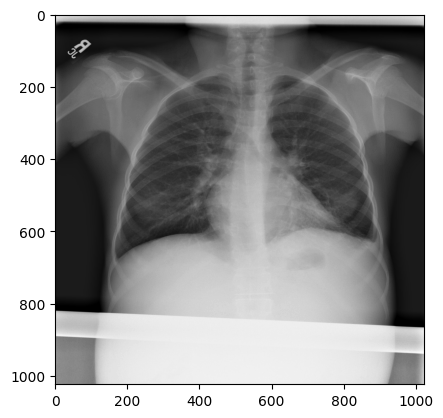

In [ ]:
#Try reading 1 file and display the image

from pydicom import dcmread
import pydicom as dicom
#../input/dataset-ph/stage_2_train_images/stage_2_train_images

import cv2 as cv
import glob
path=[]
path = glob.glob("stage_2_train_images/*")
arr = dcmread(path[0])
print(path[0])
ds = dicom.dcmread(path[0])
plt.imshow(ds.pixel_array, cmap="gray")
a = path[0].split("/")[1]
print(a)

In [ ]:
#cv_img = []
f_path = []
a_image =[]
pat_id = []
i=0
for img in path:#Combining all the values in the array
    fpath = path[i]
    a = img.split("/")[1]
    id= a.split(".")[0]
    f_path.append(fpath)
    a_image.append(a)
    pat_id.append(id)
    #n = dicom.dcmread(img)
    #cv_img.append(n)
    i += 1

In [ ]:
#cv_img1 = np.asarray(cv_img)  # Train images set
#Convert in to dataframes
#actual_image = pd.DataFrame(cv_img1,columns=['Actual_image']) 
Image_name = pd.DataFrame(a_image,columns=['Image_name'])
file_path = pd.DataFrame(f_path,columns=['File_path'])
#actual_image = pd.DataFrame(actual_image,columns=['Actual_image'])
patientId = pd.DataFrame(pat_id,columns=['patientId'])


In [ ]:
#result = pd.concat([patientId,Image_name,actual_image,file_path], axis=1, join="inner")

result = pd.concat([patientId,Image_name,file_path], axis=1, join="inner")

In [ ]:
result

patientId  \
0      0a0f91dc-6015-4342-b809-d19610854a21   
1      0a0f6755-610d-4b7c-a460-5f5a8f5c0743   
2      0a2c130c-c536-4651-836d-95d07e9a89cf   
3      0a2f6cf6-1f45-44c8-bcf0-98a3b466b597   
4      0a03a65b-9e45-4e3d-ae6c-b8a37112ab31   
...                                     ...   
26679  fffb2395-8edd-4954-8a89-ffe2fd329be3   
26680  fffba05a-1635-4545-9bbd-57ad4cfe8d27   
26681  fffc95b5-605b-4226-80ab-62caec682b22   
26682  fffcff11-d018-4414-971a-a7cefa327795   
26683  fffec09e-8a4a-48b1-b33e-ab4890ccd136   

                                     Image_name  \
0      0a0f91dc-6015-4342-b809-d19610854a21.dcm   
1      0a0f6755-610d-4b7c-a460-5f5a8f5c0743.dcm   
2      0a2c130c-c536-4651-836d-95d07e9a89cf.dcm   
3      0a2f6cf6-1f45-44c8-bcf0-98a3b466b597.dcm   
4      0a03a65b-9e45-4e3d-ae6c-b8a37112ab31.dcm   
...                                         ...   
26679  fffb2395-8edd-4954-8a89-ffe2fd329be3.dcm   
26680  fffba05a-1635-4545-9bbd-57ad4cfe8d27.dcm   
26681  fffc95b5-605b-4226-80ab-62caec682b22.dcm   
26682  fffcff11-d018-4414-971a-a7cefa327795.dcm   
26683  fffec09e-8a4a-48b1-b33e-ab4890ccd136.dcm   

                                               File_path  
0      stage_2_train_images/0a0f91dc-6015-4342-b809-d...  
1      stage_2_train_images/0a0f6755-610d-4b7c-a460-5...  
2      stage_2_train_images/0a2c130c-c536-4651-836d-9...  
3      stage_2_train_images/0a2f6cf6-1f45-44c8-bcf0-9...  
4      stage_2_train_images/0a03a65b-9e45-4e3d-ae6c-b...  
...                                                  ...  
26679  stage_2_train_images/fffb2395-8edd-4954-8a89-f...  
26680  stage_2_train_images/fffba05a-1635-4545-9bbd-5...  
26681  stage_2_train_images/fffc95b5-605b-4226-80ab-6...  
26682  stage_2_train_images/fffcff11-d018-4414-971a-a...  
26683  stage_2_train_images/fffec09e-8a4a-48b1-b33e-a...  

[26684 rows x 3 columns]

In [ ]:
label = pd.read_csv('stage_2_train_labels.csv')

In [ ]:
label

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
30222       1  
30223       0  
30224       0  
30225       1  
30226       1  

[30227 rows x 6 columns]

In [ ]:
label["bounding_box_coords"] = [ [x, y, width, height ] for x, y, width, height  in zip(label["x"], label["y"], label["width"], label["height"])  ]   

In [ ]:
label.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

            bounding_box_coords  
0          [nan, nan, nan, nan]  
1          [nan, nan, nan, nan]  
2          [nan, nan, nan, nan]  
3          [nan, nan, nan, nan]  
4  [264.0, 152.0, 213.0, 379.0]

In [ ]:
final_dataset = pd.merge(result,label, how='inner', left_on = 'patientId', right_on = 'patientId')

In [ ]:
final_dataset.head(20)

patientId  \
0   0a0f91dc-6015-4342-b809-d19610854a21   
1   0a0f6755-610d-4b7c-a460-5f5a8f5c0743   
2   0a2c130c-c536-4651-836d-95d07e9a89cf   
3   0a2f6cf6-1f45-44c8-bcf0-98a3b466b597   
4   0a03a65b-9e45-4e3d-ae6c-b8a37112ab31   
5   0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27   
6   0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27   
7   0a4b4307-d370-416e-afe5-7c9aeb1d6953   
8   0a4d9634-7ee8-4512-ba83-6ff5e352b2c2   
9   0a5a6574-d94d-441f-afe4-115ba66b322e   
10  0a5b4860-e6ab-4737-a389-9d0cf7300770   
11  0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0   
12  0a6a5956-58cf-4f17-9e39-7e0d17310f67   
13  0a7b0cc8-af04-4d2c-9267-6fdfb05f48f2   
14  0a7b13a9-bcfe-4a99-b699-4c8cf6882f04   
15  0a8b9570-2684-48e1-b016-e14a6a79cd3e   
16  0a8ccb49-debc-4e9a-b5dc-eefc3fe909ca   
17  0a8d486f-1aa6-4fcf-b7be-4bf04fc8628b   
18  0a8d486f-1aa6-4fcf-b7be-4bf04fc8628b   
19  0a8db596-9ef7-4b6c-a5db-7bb6029d0b9d   

                                  Image_name  \
0   0a0f91dc-6015-4342-b809-d19610854a21.dcm   
1   0a0f6755-610d-4b7c-a460-5f5a8f5c0743.dcm   
2   0a2c130c-c536-4651-836d-95d07e9a89cf.dcm   
3   0a2f6cf6-1f45-44c8-bcf0-98a3b466b597.dcm   
4   0a03a65b-9e45-4e3d-ae6c-b8a37112ab31.dcm   
5   0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27.dcm   
6   0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27.dcm   
7   0a4b4307-d370-416e-afe5-7c9aeb1d6953.dcm   
8   0a4d9634-7ee8-4512-ba83-6ff5e352b2c2.dcm   
9   0a5a6574-d94d-441f-afe4-115ba66b322e.dcm   
10  0a5b4860-e6ab-4737-a389-9d0cf7300770.dcm   
11  0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0.dcm   
12  0a6a5956-58cf-4f17-9e39-7e0d17310f67.dcm   
13  0a7b0cc8-af04-4d2c-9267-6fdfb05f48f2.dcm   
14  0a7b13a9-bcfe-4a99-b699-4c8cf6882f04.dcm   
15  0a8b9570-2684-48e1-b016-e14a6a79cd3e.dcm   
16  0a8ccb49-debc-4e9a-b5dc-eefc3fe909ca.dcm   
17  0a8d486f-1aa6-4fcf-b7be-4bf04fc8628b.dcm   
18  0a8d486f-1aa6-4fcf-b7be-4bf04fc8628b.dcm   
19  0a8db596-9ef7-4b6c-a5db-7bb6029d0b9d.dcm   

                                            File_path      x      y  width  \
0   stage_2_train_images/0a0f91dc-6015-4342-b809-d...  646.0  465.0  200.0   
1   stage_2_train_images/0a0f6755-610d-4b7c-a460-5...    NaN    NaN    NaN   
2   stage_2_train_images/0a2c130c-c536-4651-836d-9...  118.0  328.0  333.0   
3   stage_2_train_images/0a2f6cf6-1f45-44c8-bcf0-9...  561.0  257.0  272.0   
4   stage_2_train_images/0a03a65b-9e45-4e3d-ae6c-b...    NaN    NaN    NaN   
5   stage_2_train_images/0a03fbf6-3c9a-4e2e-89ce-c...  106.0  685.0  377.0   
6   stage_2_train_images/0a03fbf6-3c9a-4e2e-89ce-c...  582.0  522.0  403.0   
7   stage_2_train_images/0a4b4307-d370-416e-afe5-7...    NaN    NaN    NaN   
8   stage_2_train_images/0a4d9634-7ee8-4512-ba83-6...    NaN    NaN    NaN   
9   stage_2_train_images/0a5a6574-d94d-441f-afe4-1...    NaN    NaN    NaN   
10  stage_2_train_images/0a5b4860-e6ab-4737-a389-9...    NaN    NaN    NaN   
11  stage_2_train_images/0a5c4dcb-33ac-4466-9dbf-4...    NaN    NaN    NaN   
12  stage_2_train_images/0a6a5956-58cf-4f17-9e39-7...  538.0  231.0  264.0   
13  stage_2_train_images/0a7b0cc8-af04-4d2c-9267-6...    NaN    NaN    NaN   
14  stage_2_train_images/0a7b13a9-bcfe-4a99-b699-4...    NaN    NaN    NaN   
15  stage_2_train_images/0a8b9570-2684-48e1-b016-e...    NaN    NaN    NaN   
16  stage_2_train_images/0a8ccb49-debc-4e9a-b5dc-e...    NaN    NaN    NaN   
17  stage_2_train_images/0a8d486f-1aa6-4fcf-b7be-4...  222.0  622.0  155.0   
18  stage_2_train_images/0a8d486f-1aa6-4fcf-b7be-4...  634.0  520.0  160.0   
19  stage_2_train_images/0a8db596-9ef7-4b6c-a5db-7...    NaN    NaN    NaN   

    height  Target           bounding_box_coords  
0    168.0       1  [646.0, 465.0, 200.0, 168.0]  
1      NaN       0          [nan, nan, nan, nan]  
2    219.0       1  [118.0, 328.0, 333.0, 219.0]  
3    439.0       1  [561.0, 257.0, 272.0, 439.0]  
4      NaN       0          [nan, nan, nan, nan]  
5    256.0       1  [106.0, 685.0, 377.0, 256.0]  
6    444.0       1  [582.0, 522.0, 403.0, 444.0]  
7      NaN       0          [nan, nan, nan, nan]  

# __Preprocessing__

In [ ]:
final_dataset_copy = final_dataset.copy()
final_dataset_copy = final_dataset_copy.astype("object")

for column in "x", "y", "width", "height", "bounding_box_coords" :
    final_dataset_copy[column] = [ [x] for x in final_dataset_copy[column] ]

index = 0
indices_to_drop = []

index_increment = 1
while(index + 1 < len(final_dataset_copy)):
    #print(index)    
    while final_dataset_copy.at[index, "patientId"] == final_dataset_copy.at[index + index_increment, "patientId"] and index + index_increment < len(final_dataset_copy):
        #print("combining duplicate records")
        for column in "x", "y", "width", "height", "bounding_box_coords" :
            final_dataset_copy.at[index, column].append(final_dataset_copy.at[index + index_increment, column][0])

        indices_to_drop.append(index + index_increment)
        index_increment += 1

    index += index_increment
    index_increment = 1
    

final_dataset_copy = final_dataset_copy.drop( indices_to_drop, axis = 0 )

In [ ]:
final_dataset_copy.index = np.arange(len(final_dataset_copy))
final_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26684 entries, 0 to 26683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patientId            26684 non-null  object
 1   Image_name           26684 non-null  object
 2   File_path            26684 non-null  object
 3   x                    26684 non-null  object
 4   y                    26684 non-null  object
 5   width                26684 non-null  object
 6   height               26684 non-null  object
 7   Target               26684 non-null  object
 8   bounding_box_coords  26684 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [ ]:
final_dataset_copy.head(20)

patientId  \
0   0a0f91dc-6015-4342-b809-d19610854a21   
1   0a0f6755-610d-4b7c-a460-5f5a8f5c0743   
2   0a2c130c-c536-4651-836d-95d07e9a89cf   
3   0a2f6cf6-1f45-44c8-bcf0-98a3b466b597   
4   0a03a65b-9e45-4e3d-ae6c-b8a37112ab31   
5   0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27   
6   0a4b4307-d370-416e-afe5-7c9aeb1d6953   
7   0a4d9634-7ee8-4512-ba83-6ff5e352b2c2   
8   0a5a6574-d94d-441f-afe4-115ba66b322e   
9   0a5b4860-e6ab-4737-a389-9d0cf7300770   
10  0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0   
11  0a6a5956-58cf-4f17-9e39-7e0d17310f67   
12  0a7b0cc8-af04-4d2c-9267-6fdfb05f48f2   
13  0a7b13a9-bcfe-4a99-b699-4c8cf6882f04   
14  0a8b9570-2684-48e1-b016-e14a6a79cd3e   
15  0a8ccb49-debc-4e9a-b5dc-eefc3fe909ca   
16  0a8d486f-1aa6-4fcf-b7be-4bf04fc8628b   
17  0a8db596-9ef7-4b6c-a5db-7bb6029d0b9d   
18  0a8efdc1-1dff-4d65-8948-c56a5d74a906   
19  0a9c4c04-5918-48da-9ba1-b2a3add66ae9   

                                  Image_name  \
0   0a0f91dc-6015-4342-b809-d19610854a21.dcm   
1   0a0f6755-610d-4b7c-a460-5f5a8f5c0743.dcm   
2   0a2c130c-c536-4651-836d-95d07e9a89cf.dcm   
3   0a2f6cf6-1f45-44c8-bcf0-98a3b466b597.dcm   
4   0a03a65b-9e45-4e3d-ae6c-b8a37112ab31.dcm   
5   0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27.dcm   
6   0a4b4307-d370-416e-afe5-7c9aeb1d6953.dcm   
7   0a4d9634-7ee8-4512-ba83-6ff5e352b2c2.dcm   
8   0a5a6574-d94d-441f-afe4-115ba66b322e.dcm   
9   0a5b4860-e6ab-4737-a389-9d0cf7300770.dcm   
10  0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0.dcm   
11  0a6a5956-58cf-4f17-9e39-7e0d17310f67.dcm   
12  0a7b0cc8-af04-4d2c-9267-6fdfb05f48f2.dcm   
13  0a7b13a9-bcfe-4a99-b699-4c8cf6882f04.dcm   
14  0a8b9570-2684-48e1-b016-e14a6a79cd3e.dcm   
15  0a8ccb49-debc-4e9a-b5dc-eefc3fe909ca.dcm   
16  0a8d486f-1aa6-4fcf-b7be-4bf04fc8628b.dcm   
17  0a8db596-9ef7-4b6c-a5db-7bb6029d0b9d.dcm   
18  0a8efdc1-1dff-4d65-8948-c56a5d74a906.dcm   
19  0a9c4c04-5918-48da-9ba1-b2a3add66ae9.dcm   

                                            File_path               x  \
0   stage_2_train_images/0a0f91dc-6015-4342-b809-d...         [646.0]   
1   stage_2_train_images/0a0f6755-610d-4b7c-a460-5...           [nan]   
2   stage_2_train_images/0a2c130c-c536-4651-836d-9...         [118.0]   
3   stage_2_train_images/0a2f6cf6-1f45-44c8-bcf0-9...         [561.0]   
4   stage_2_train_images/0a03a65b-9e45-4e3d-ae6c-b...           [nan]   
5   stage_2_train_images/0a03fbf6-3c9a-4e2e-89ce-c...  [106.0, 582.0]   
6   stage_2_train_images/0a4b4307-d370-416e-afe5-7...           [nan]   
7   stage_2_train_images/0a4d9634-7ee8-4512-ba83-6...           [nan]   
8   stage_2_train_images/0a5a6574-d94d-441f-afe4-1...           [nan]   
9   stage_2_train_images/0a5b4860-e6ab-4737-a389-9...           [nan]   
10  stage_2_train_images/0a5c4dcb-33ac-4466-9dbf-4...           [nan]   
11  stage_2_train_images/0a6a5956-58cf-4f17-9e39-7...         [538.0]   
12  stage_2_train_images/0a7b0cc8-af04-4d2c-9267-6...           [nan]   
13  stage_2_train_images/0a7b13a9-bcfe-4a99-b699-4...           [nan]   
14  stage_2_train_images/0a8b9570-2684-48e1-b016-e...           [nan]   
15  stage_2_train_images/0a8ccb49-debc-4e9a-b5dc-e...           [nan]   
16  stage_2_train_images/0a8d486f-1aa6-4fcf-b7be-4...  [222.0, 634.0]   
17  stage_2_train_images/0a8db596-9ef7-4b6c-a5db-7...           [nan]   
18  stage_2_train_images/0a8efdc1-1dff-4d65-8948-c...         [258.0]   
19  stage_2_train_images/0a9c4c04-5918-48da-9ba1-b...   [529.0, 92.0]   

                 y           width          height Target  \
0          [465.0]         [200.0]         [168.0]      1   
1            [nan]           [nan]           [nan]      0   
2          [328.0]         [333.0]         [219.0]      1   
3          [257.0]         [272.0]         [439.0]      1   
4            [nan]           [nan]           [nan]      0   
5   [685.0, 522.0]  [377.0, 403.0]  [256.0, 444.0]      1   
6            [nan]           [nan]           [nan]      0   
7            [nan]           [nan]           [nan]      0   
8            [

In [ ]:
final_dataset = final_dataset_copy.copy()

In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26684 entries, 0 to 26683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patientId            26684 non-null  object
 1   Image_name           26684 non-null  object
 2   File_path            26684 non-null  object
 3   x                    26684 non-null  object
 4   y                    26684 non-null  object
 5   width                26684 non-null  object
 6   height               26684 non-null  object
 7   Target               26684 non-null  object
 8   bounding_box_coords  26684 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


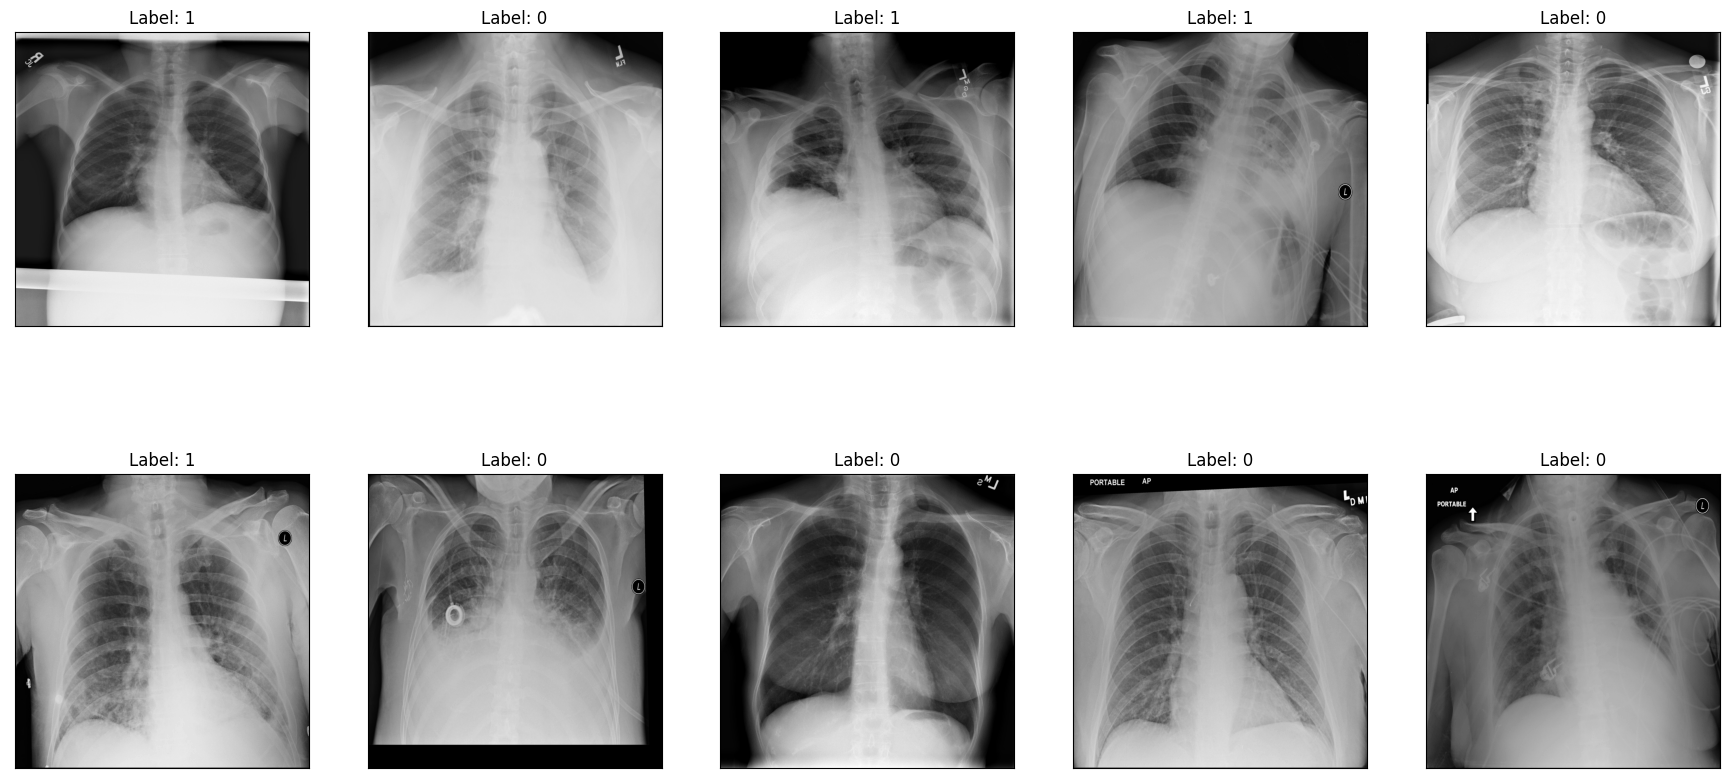

In [ ]:
#Display 1st 10 images from training dataset

fig = plt.figure(figsize=(22, 22))

for i in range(0,10) :
    ds = dicom.dcmread(final_dataset['File_path'][i])
    ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    ax.imshow(ds.pixel_array, cmap="gray")
    ax.set_title(f"Label: {final_dataset['Target'][i]}")


# __EDA__

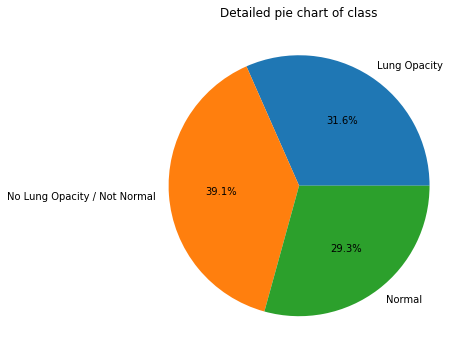

In [ ]:
detailed_dataset = pd.read_csv("stage_2_detailed_class_info.csv")

fig = plt.figure(figsize = (6, 6))
pieData = detailed_dataset.groupby("class")["class"].count()
pieData.plot.pie(autopct="%.1f%%")
plt.title("Detailed pie chart of class")
plt.ylabel("")
plt.show()

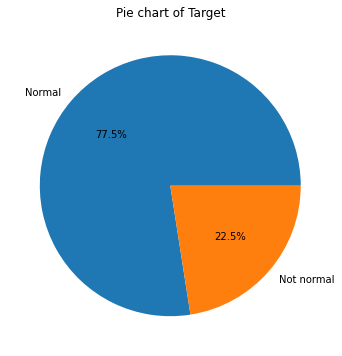

In [ ]:
fig = plt.figure(figsize = (6, 6))
pieData = final_dataset.groupby("Target")["Target"].count()
pieData = pieData.rename(index={0: "Normal", 1: "Not normal"})
pieData.plot.pie(autopct="%.1f%%")
plt.title("Pie chart of Target")
plt.ylabel("")
plt.show()

**Observations**:
1. The target column has 2 unique values i.e normal and pnuemonic
2. Almost 1/3rd of the patients have pneumonia.

In [ ]:
# Sample metadata of a dicom image
dicom.filereader.dcmread(final_dataset['File_path'][0])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.3171.1517874300.465651
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.3171.1517874300.465651
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [ ]:
# Extracting metadata from dicom to find out any correlation between them.
keys = ['PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition']
meta = []

typemap = {
  dicom.uid.UID: str,
  dicom.multival.MultiValue: list
}

def cast(x):
  return typemap.get(type(x), lambda x: x)(x)

for _, row in final_dataset.iterrows():
  obj = dcmread(row["File_path"])
  data = [cast(obj.get(key, np.nan)) for key in keys]
  data.append(row["Target"])
  meta.append(data)

metadata = pd.DataFrame(meta, columns=['PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'Target'])

In [ ]:
metadata.head()

PatientAge PatientSex BodyPartExamined ViewPosition  Target
0         59          M            CHEST           PA       0
1         43          F            CHEST           PA       0
2         45          F            CHEST           AP       1
3         52          M            CHEST           PA       0
4         26          M            CHEST           AP       1

In [ ]:
metadataNew = metadata.copy()
metadataNew['PatientAge'] = metadataNew.PatientAge.astype('int64')
metadataNew = pd.concat((metadataNew, pd.get_dummies(metadataNew["PatientSex"])), axis=1)
metadataNew.drop(["PatientSex", "F"], axis=1, inplace=True)

In [ ]:
metadataNew.head()

PatientAge BodyPartExamined ViewPosition  Target  M
0          59            CHEST           PA       0  1
1          43            CHEST           PA       0  0
2          45            CHEST           AP       1  0
3          52            CHEST           PA       0  1
4          26            CHEST           AP       1  1

In [ ]:
pd.DataFrame(metadataNew.PatientAge.describe())

PatientAge
count  26684.000000
mean      47.030018
std       16.810578
min        1.000000
25%       34.000000
50%       49.000000
75%       59.000000
max      155.000000

**Observations:**
1. There are total of 26684 patients overall.
2. 25% of **PatientAge** in the training dataset is 34.
3. 50% of **PatientAge** in the training dataset is 49.
4. 75% of **PatientAge** in the training dataset is 59.
5. Minimum age of patient is 1.
6. Maximum age of patient is 155.

Maximum age of patient is 155 which seems to be an entry error as it is not possible.


In [ ]:
pd.DataFrame(metadataNew[metadataNew["Target"] == 1].PatientAge.describe())

PatientAge
count  6012.000000
mean     45.582502
std      17.468836
min       1.000000
25%      32.000000
50%      47.000000
75%      58.000000
max      92.000000

**Observations:**
1. There are total of 6012 patients having pneumonia.
2. 25% of **PatientAge** in the training dataset is 32.
3. 50% of **PatientAge** in the training dataset is 47.
4. 75% of **PatientAge** in the training dataset is 58.
5. Minimum age of patient is 1.
6. Maximum age of patient is 92.

In [ ]:
print("Body Part Examined:", metadataNew['BodyPartExamined'].unique())

Body Part Examined: ['CHEST']


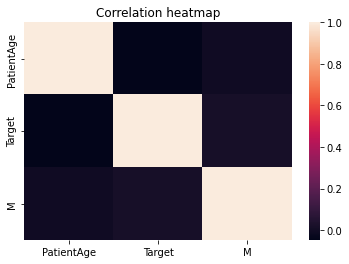

In [ ]:
sns.heatmap(metadataNew.corr())
plt.title("Correlation heatmap")
plt.show()

There is no signifanct correlation among target, gender and age as seen above.

In [ ]:
metadata.PatientSex.value_counts()

M    15166
F    11518
Name: PatientSex, dtype: int64

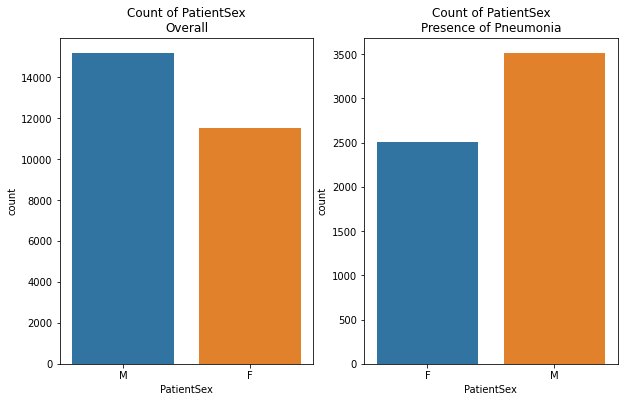

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

sns.countplot(x = metadata['PatientSex'], ax=ax1)
ax1.set_title('Count of PatientSex\nOverall')

sns.countplot(x = metadata.loc[metadata['Target'] == 1, 'PatientSex'], ax=ax2)
ax2.set_title('Count of PatientSex\nPresence of Pneumonia')
plt.show()

**Observations:**
1. More number of male patients are present in the dataset.
2. Out of 15166 males around 3500 were tested positive for pneumonia.
3. Out of 11518 females around 2500 were tested positive for pneumonia.

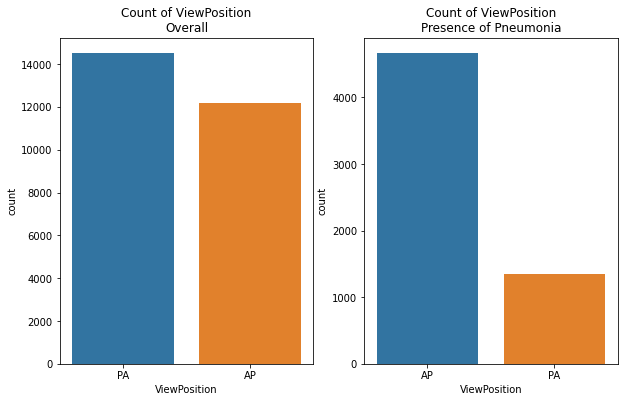

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

sns.countplot(x = metadataNew['ViewPosition'], ax=ax1)
ax1.set_title('Count of ViewPosition\nOverall')

sns.countplot(x = metadataNew.loc[metadataNew['Target'] == 1, 'ViewPosition'], ax=ax2)
ax2.set_title('Count of ViewPosition\nPresence of Pneumonia')
plt.show()

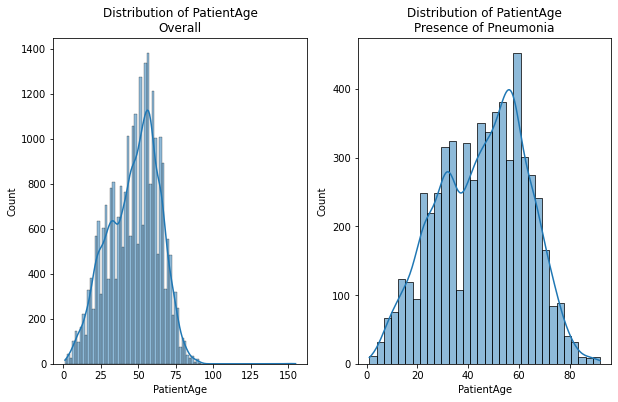

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

sns.histplot(metadataNew['PatientAge'], kde=True, ax=ax1)
ax1.set_title('Distribution of PatientAge\nOverall')

sns.histplot(metadataNew.loc[metadataNew['Target'] == 1, 'PatientAge'], kde=True, ax=ax2)
ax2.set_title('Distribution of PatientAge\nPresence of Pneumonia')

plt.show()

**Observations:**
1. In overall patients, the graph seems to be right skewed which indicates presence of outliers.
2. Most of the overall patients lie in range 45-55.
3. Age 59-60 has the most number of pneumonic patients.

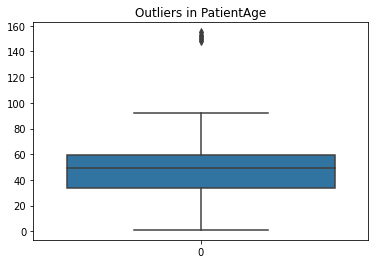

In [ ]:
sns.boxplot(data = metadataNew['PatientAge'])
plt.title('Outliers in PatientAge')
plt.show()

In [ ]:
def drawBoxes(image, boxes):
  image = np.stack([image] * 3, axis=2) #Converting image to 3-channel RGB
  for box in boxes:
    rgb = np.array([238, 34, 14])
    im = overlay_box(image, box, rgb, 6)
    return im

def overlay_box(image, box, rgb, stroke=1):
  box = [int(b) for b in box]

  y1, x1, height, width = box
  y2 = y1 + height
  x2 = x1 + width

  image[y1:y1 + stroke, x1:x2] = rgb
  image[y2:y2 + stroke, x1:x2] = rgb
  image[y1:y2, x1:x1 + stroke] = rgb
  image[y1:y2, x2:x2 + stroke] = rgb

  return image

In [ ]:
sample = final_dataset[final_dataset["Target"] == 1].sample(10)

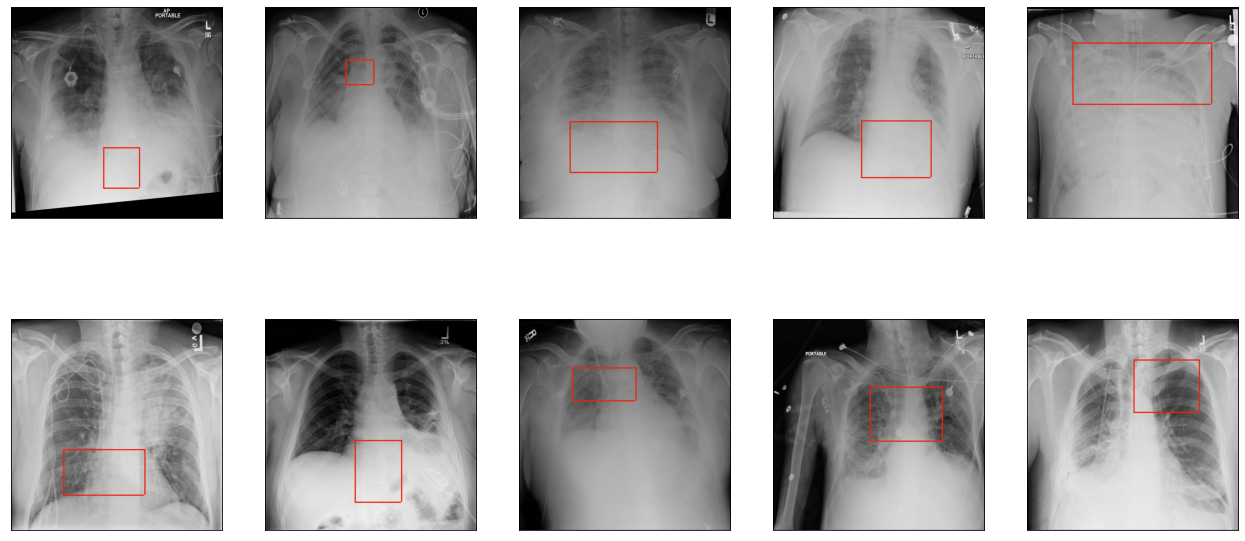

In [ ]:
fig = plt.figure(figsize=(22, 22))
i = 0
for _, row in sample.iterrows():
  ds = dicom.dcmread(row['File_path'])
  boxes = row['bounding_box_coords']
  image = drawBoxes(ds.pixel_array, boxes)
  ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
  ax.imshow(image, cmap="gray")
  i += 1

# Preprocessing

In [ ]:
dataset_neg_samples = final_dataset[final_dataset["Target"] == 0 ]
dataset_pos_samples = final_dataset[final_dataset["Target"] == 1 ]
num_neg_samples = len(dataset_neg_samples)
num_pos_samples = len(dataset_pos_samples)

undersampled_neg_samples = dataset_neg_samples.sample(num_pos_samples)

undersampled_dataset = pd.concat([undersampled_neg_samples, dataset_pos_samples], ignore_index = True, axis = 0)

undersampled_dataset.describe()

patientId  \
count                                  12024   
unique                                 12024   
top     eee35b66-1cde-4324-acfb-757b330a7b5b   
freq                                       1   

                                      Image_name  \
count                                      12024   
unique                                     12024   
top     eee35b66-1cde-4324-acfb-757b330a7b5b.dcm   
freq                                           1   

                                                File_path        x        y  \
count                                               12024    12024    12024   
unique                                              12024     9951     9993   
top     stage_2_train_images/eee35b66-1cde-4324-acfb-7...  [205.0]  [480.0]   
freq                                                    1       16       14   

          width   height  Target     bounding_box_coords  
count     12024    12024   12024                   12024  
unique     9530     9896       2                   12024  
top     [250.0]  [181.0]       0  [[nan, nan, nan, nan]]  
freq         24       21    6012                       1

In [ ]:
if(not os.path.exists("undersampled")):
  os.mkdir("undersampled")

  os.mkdir("undersampled/1")
  os.mkdir("undersampled/0")

  for index, (file_path, label) in enumerate(zip(undersampled_dataset["File_path"], undersampled_dataset["Target"])):
    image = dcmread(file_path).pixel_array
    save_img(path = f"undersampled/{label}/{index}.jpeg", x = image.reshape(1024, 1024, 1))

In [ ]:
len(undersampled_dataset[undersampled_dataset["Target"] == 1] ) / len(undersampled_dataset[undersampled_dataset["Target"] == 0] ) 

1.0

In [ ]:
def preprocessData():
  os.mkdir("preprocessed")
  os.mkdir("preprocessed/1")
  os.mkdir("preprocessed/0") 

  for index, (file_path, label) in enumerate(zip(final_dataset["File_path"], final_dataset["Target"])):
    image = dcmread(file_path).pixel_array
    save_img(path = f"preprocessed/{label}/{index}.jpeg", x = image.reshape(1024, 1024, 1))

if(not os.path.exists("preprocessed")):
  preprocessData()

### Creating semantic segmentation dataset

In [2]:
import gc
gc.collect()

44

# Execute this

In [3]:
def create_semantic_segmentation_dataset(image_dims = (224, 224), train = True):
    """
    Create numpy array consisting of input images and their corresponding masks
    """
    if train:
        preprocessed_data = np.zeros(shape = (len(final_dataset_copy), image_dims[0], image_dims[1], 1), dtype = np.uint8)
    else:
        preprocessed_targets = np.zeros(shape = (len(final_dataset_copy), image_dims[0], image_dims[1], 1), dtype = np.uint8)
    
    for index, path in enumerate(final_dataset_copy["File_path"]):
        img = dcmread(path).pixel_array.reshape(1024, 1024, 1)
        #img = keras.utils.array_to_img(img)
        img = tf.Variable(img)
        img = tf.image.resize(img, size = image_dims)
        if train:
            preprocessed_data[index] = keras.utils.img_to_array(img)
        else:
            if not np.isnan(final_dataset_copy.at[index, "bounding_box_coords"][0][0]):
                #print(final_dataset_copy.at[index, "bounding_box_coords"][0][0])
                for bounding_boxes in final_dataset_copy.at[index, "bounding_box_coords"]:
                    # mutlitply by 0.25 since 1024 X 1024 reduced to 256 X 256
                    scaling_factor_x = image_dims[0] / 1024
                    scaling_factor_y = image_dims[1] / 1024
                    x = int(bounding_boxes[0] * scaling_factor_x) 
                    y = int(bounding_boxes[1] * scaling_factor_y)
                    width = int(bounding_boxes[2] * scaling_factor_x)
                    height = int(bounding_boxes[3] * scaling_factor_y)
                    #preprocessed_targets[index] = keras.utils.img_to_array(img)
                    preprocessed_targets[index][ x : x + width, y : y + height ] = 255
        del img

        if index % 1000 == 0:
            print(f"Doing GC run. Processed {index} images so far")
            gc.collect()
            
    if train:
        train = preprocessed_data[ : -128]
        test = preprocessed_data[ -128 : ]
        np.save(f"./train_{image_dims[0]}_{image_dims[1]}_samples", train)
        np.save(f"./test{image_dims[0]}_{image_dims[1]}_samples", test)
    else:
        train = preprocessed_targets[ : -128]
        test = preprocessed_targets[ -128 : ]
        np.save(f"./train_{image_dims[0]}_{image_dims[1]}_targets", train)
        np.save(f"./test{image_dims[0]}_{image_dims[1]}_targets", test)


def load_semantic_segmentation_data(image_dims = (224, 224)):
    """
    Load the saved .npy files
    """
    train_data_samples = np.load(f"./train_{image_dims[0]}_{image_dims[1]}_samples.npy")
    train_data_targets = np.load(f"./train_{image_dims[0]}_{image_dims[1]}_targets.npy")
    test_data_samples = np.load(f"./test{image_dims[0]}_{image_dims[1]}_samples.npy")
    test_data_targets = np.load(f"./test{image_dims[0]}_{image_dims[1]}_targets.npy")

    train_data_samples = train_data_samples.astype(np.uint8)
    test_data_samples = test_data_samples.astype(np.uint8)
    train_data_targets = train_data_targets.astype(np.uint8)
    test_data_targets = test_data_targets.astype(np.uint8)
    
    np.divide(train_data_targets, np.uint8(255), out = train_data_targets,  casting = "unsafe")
    np.divide(test_data_targets, np.uint8(255), out = test_data_targets, casting = "unsafe")
    return (train_data_samples, train_data_targets), (test_data_samples, test_data_targets)


# __DON'T__ execute this cell

In [ ]:
create_semantic_segmentation_dataset(image_dims = (256, 256))
create_semantic_segmentation_dataset(image_dims = (256, 256), train = False)
create_semantic_segmentation_dataset()
create_semantic_segmentation_dataset(train = False)

Doing GC run. Processed 0 images so far
Doing GC run. Processed 1000 images so far
Doing GC run. Processed 2000 images so far
Doing GC run. Processed 3000 images so far
Doing GC run. Processed 4000 images so far
Doing GC run. Processed 5000 images so far
Doing GC run. Processed 6000 images so far
Doing GC run. Processed 7000 images so far
Doing GC run. Processed 8000 images so far
Doing GC run. Processed 9000 images so far
Doing GC run. Processed 10000 images so far
Doing GC run. Processed 11000 images so far
Doing GC run. Processed 12000 images so far
Doing GC run. Processed 13000 images so far
Doing GC run. Processed 14000 images so far
Doing GC run. Processed 15000 images so far
Doing GC run. Processed 16000 images so far
Doing GC run. Processed 17000 images so far
Doing GC run. Processed 18000 images so far
Doing GC run. Processed 19000 images so far
Doing GC run. Processed 20000 images so far
Doing GC run. Processed 21000 images so far
Doing GC run. Processed 22000 images so far
D

In [4]:
import gc
gc.collect()

22

In [5]:
%ls

best_baseline/           test224_224_targets.npy    train_224_224_targets.npy
drive/                   test256_256_samples.npy    train_256_256_samples.npy
sample_data/             test256_256_targets.npy    train_256_256_targets.npy
test224_224_samples.npy  train_224_224_samples.npy


# Execute this one

In [6]:
(train_data_samples, train_data_targets), (test_data_samples, test_data_targets) = load_semantic_segmentation_data(image_dims = (256, 256))
gc.collect()

76

# Semantic Segmentation data generated!!! use `load_semantic_segmentation_data` function to retrieve data(supported sizes: `(256, 256)` and `(224, 224)`

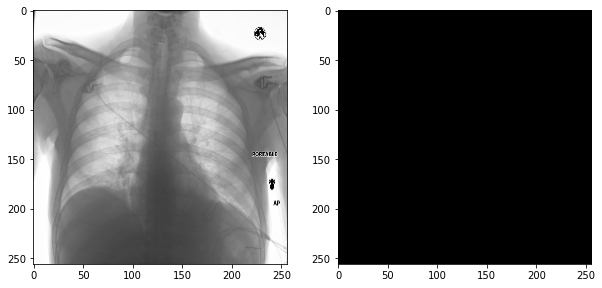

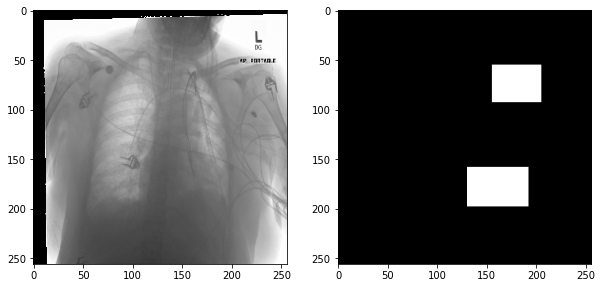

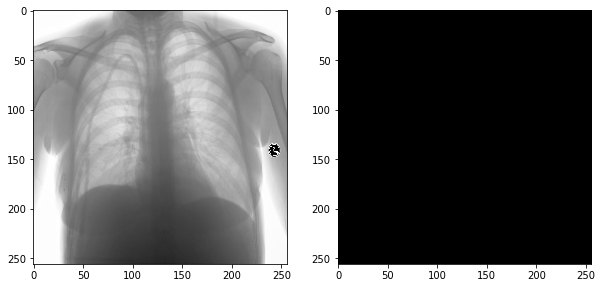

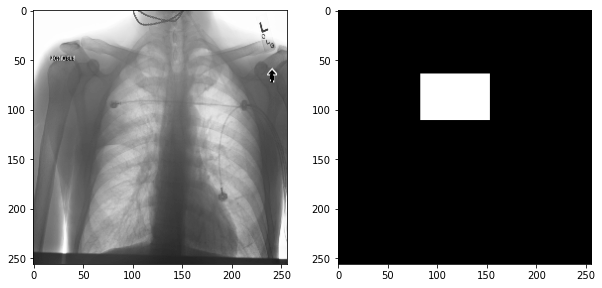

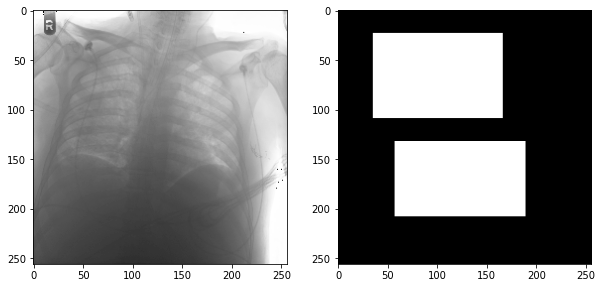

In [45]:
for img1, img2 in zip(train_data_samples[ 15 : 20 ], train_data_targets[ 15 : 20]):
    fig, axes = plt.subplots(1, 2, figsize = (10, 5))
    axes[0].imshow(keras.utils.array_to_img(img1 * 255), cmap = "gray")    
    axes[1].imshow(keras.utils.array_to_img(img2 * 255), cmap = "gray")
    plt.show()
    

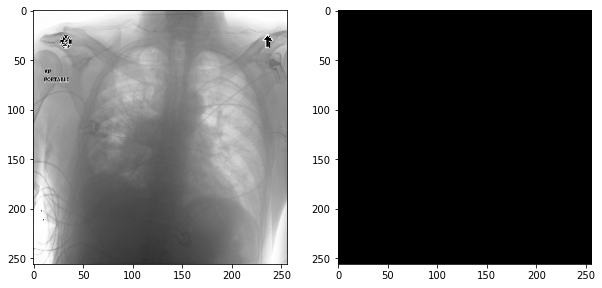

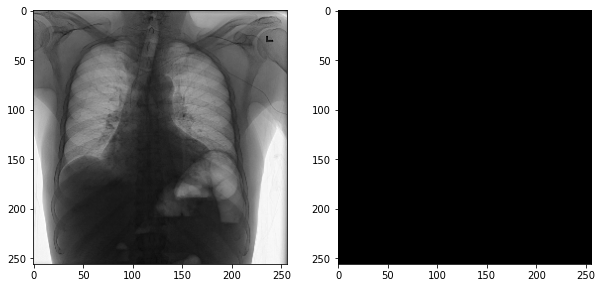

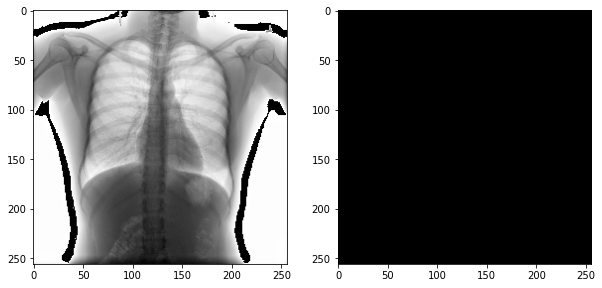

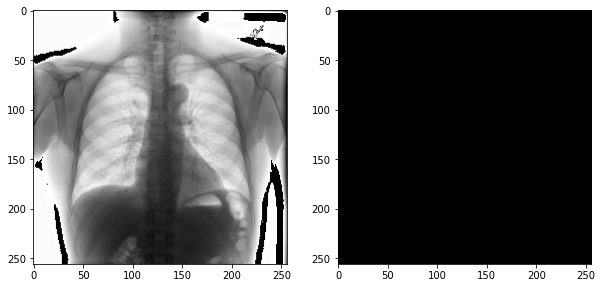

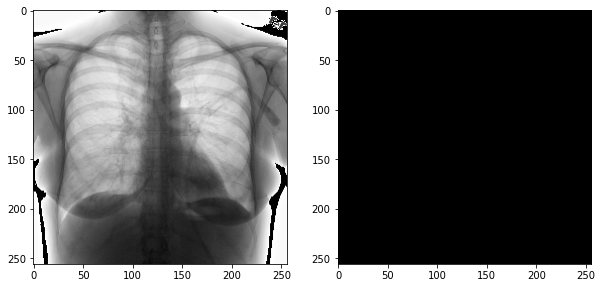

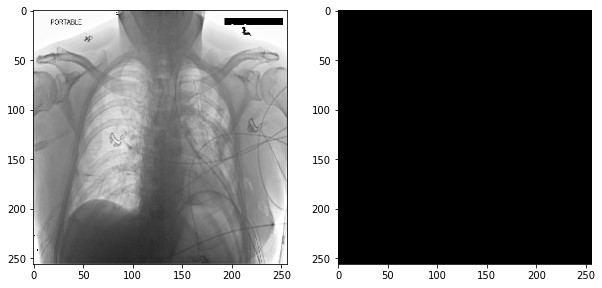

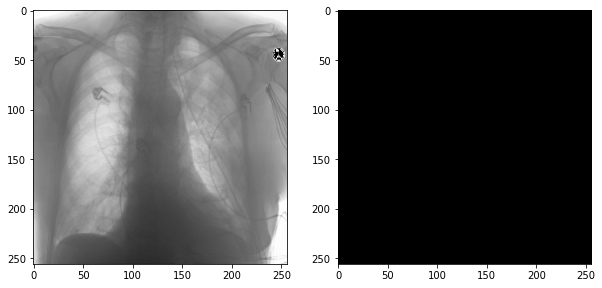

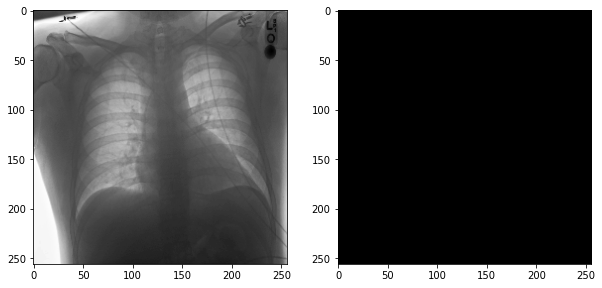

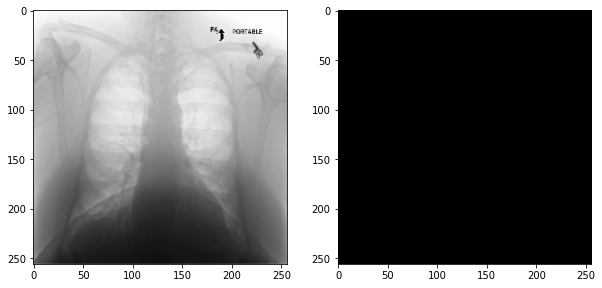

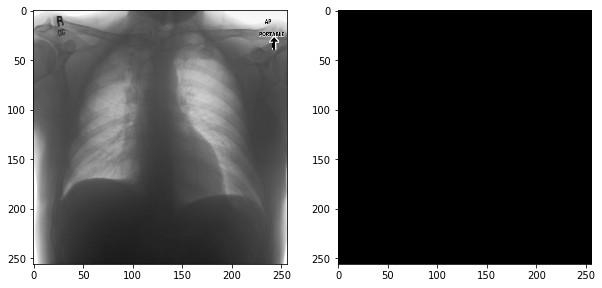

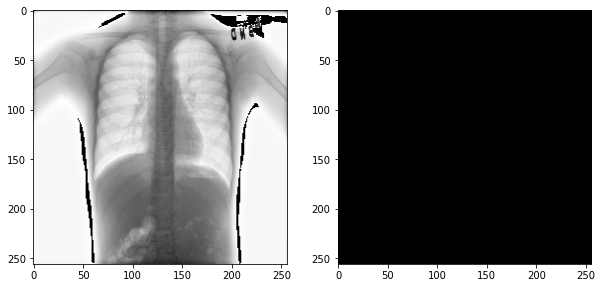

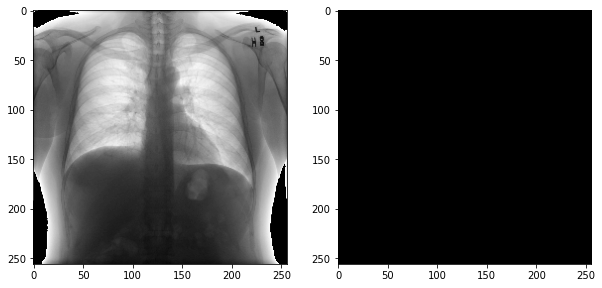

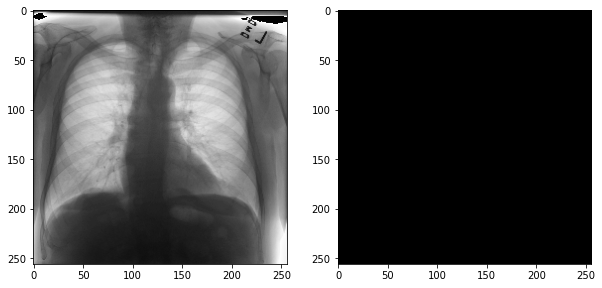

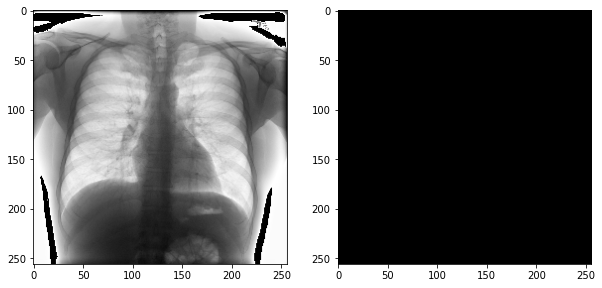

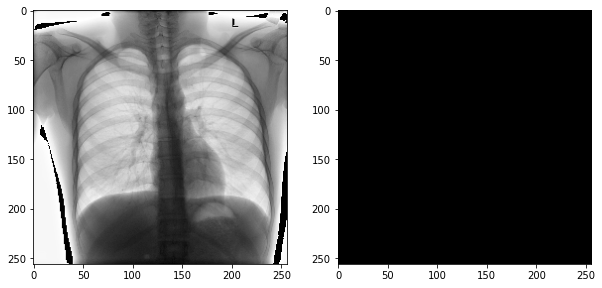

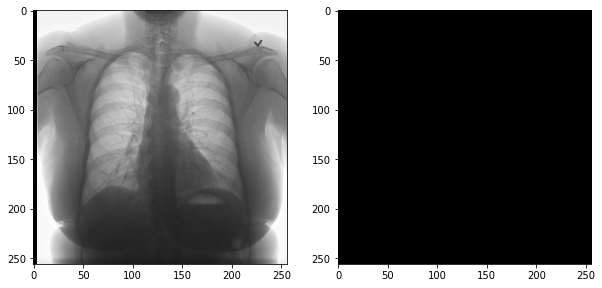

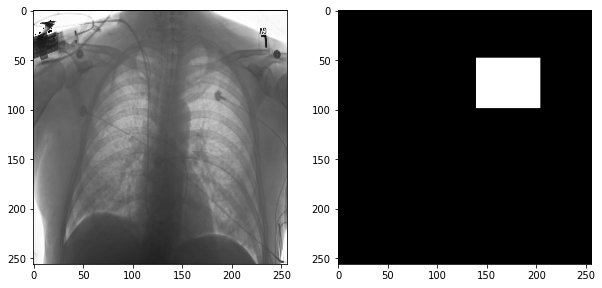

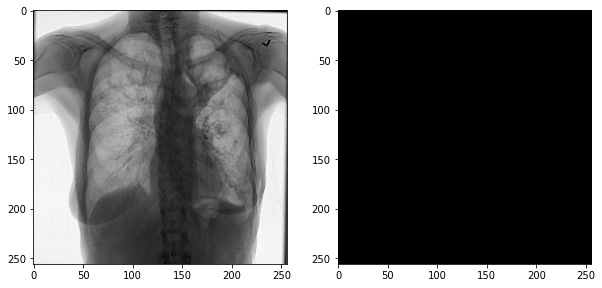

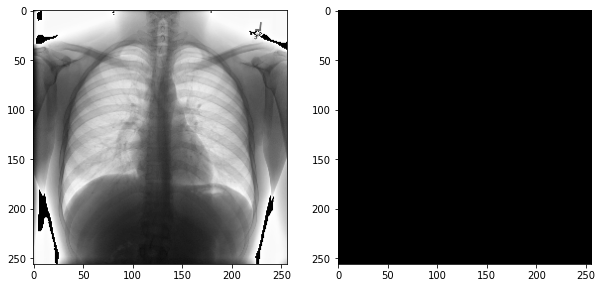

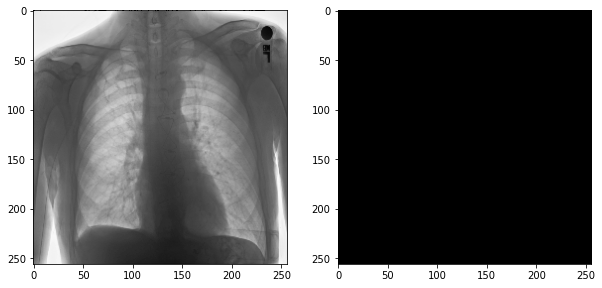

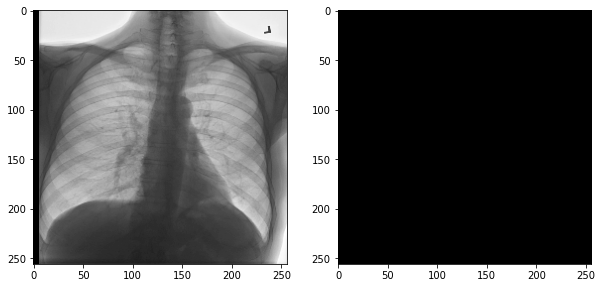

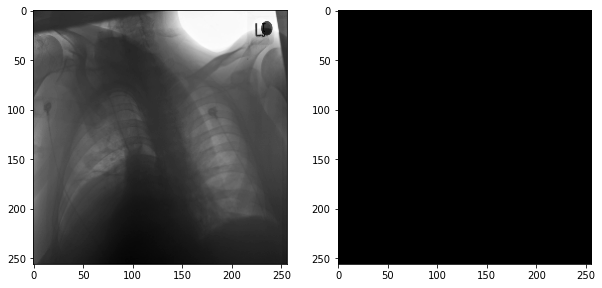

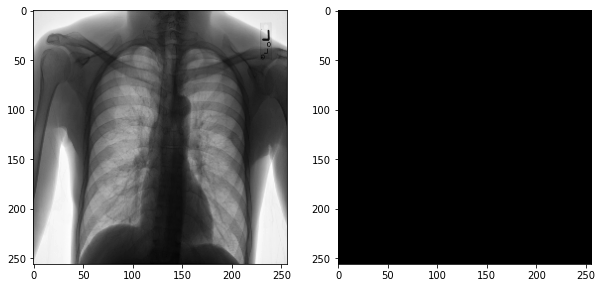

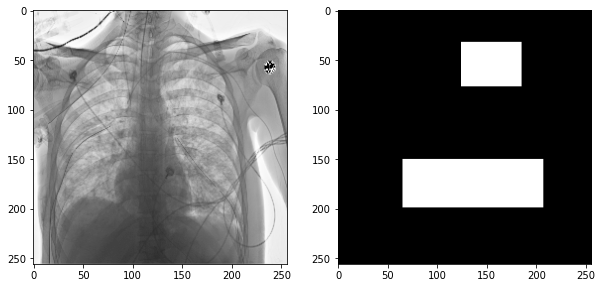

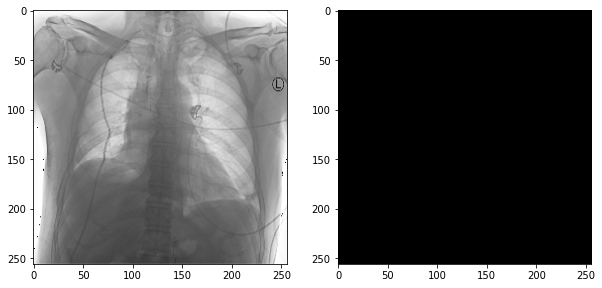

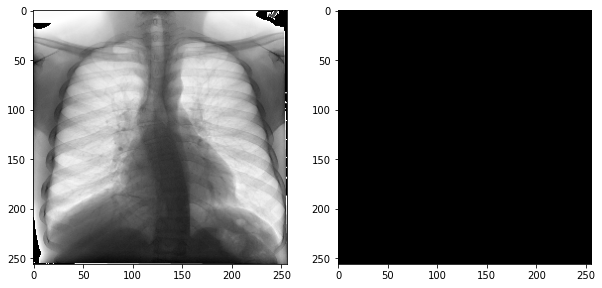

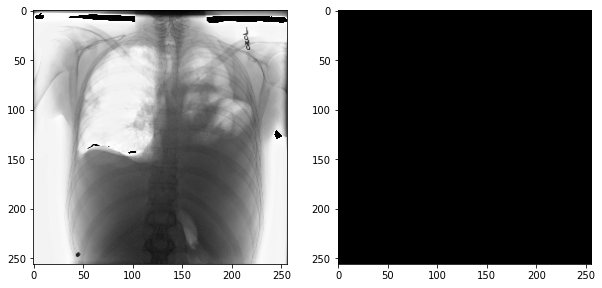

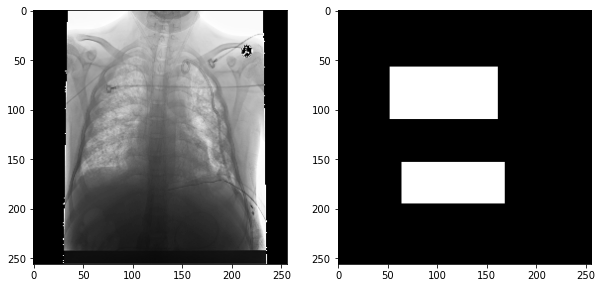

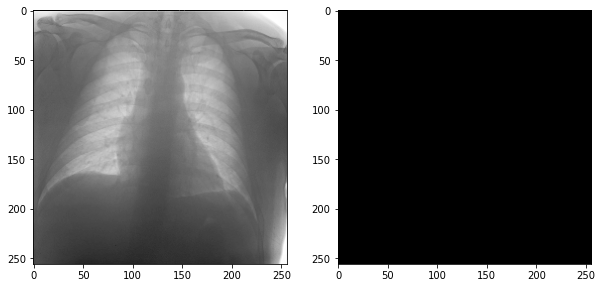

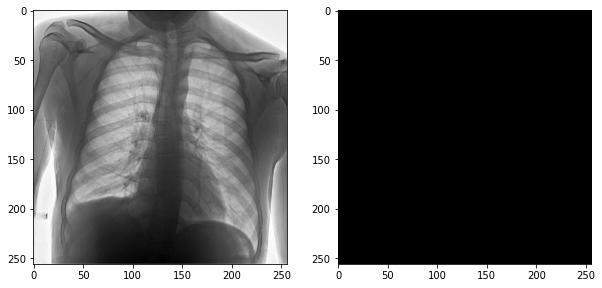

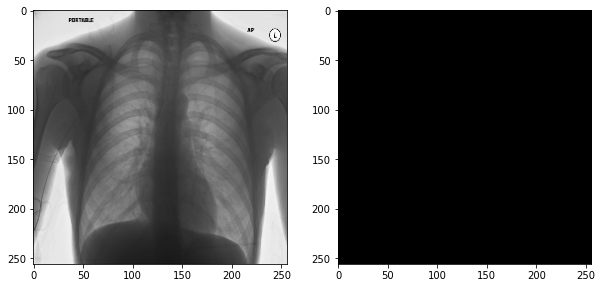

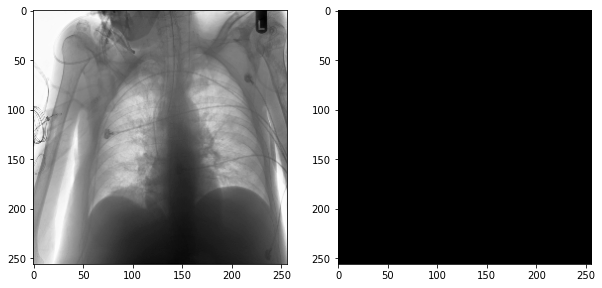

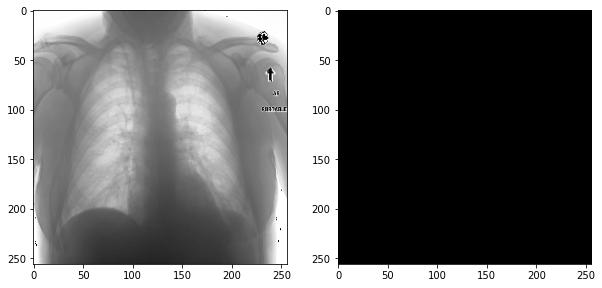

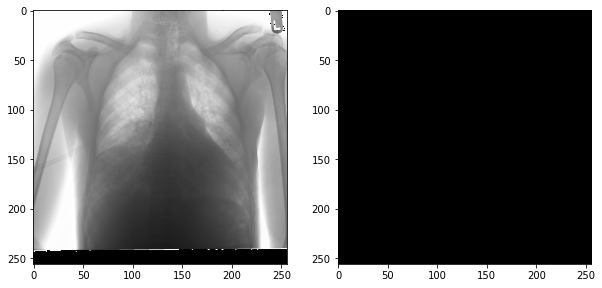

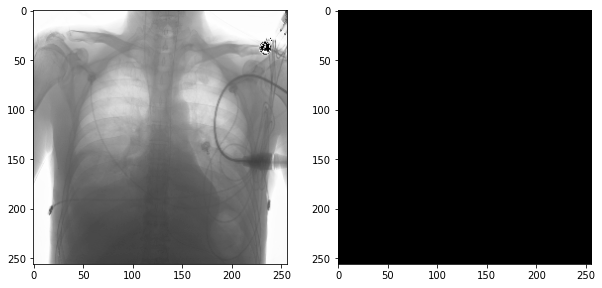

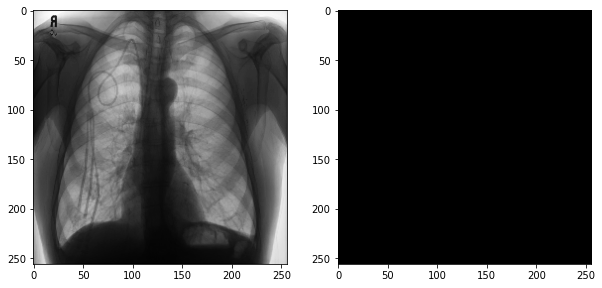

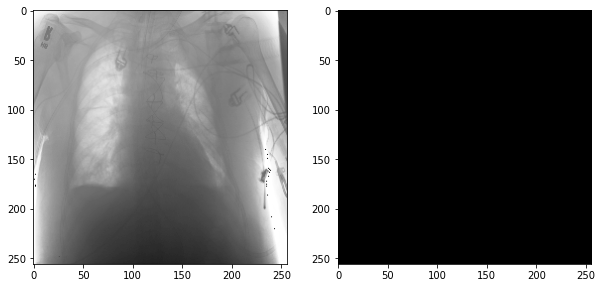

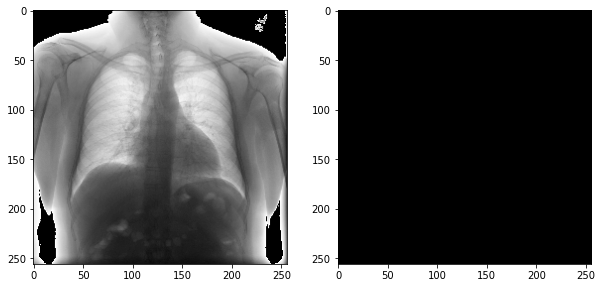

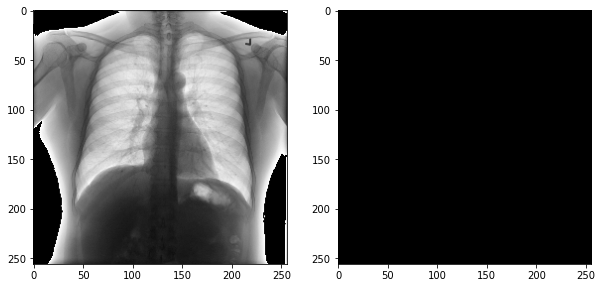

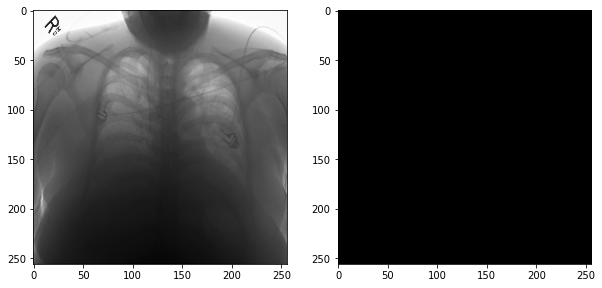

In [49]:
for img1, img2 in zip(test_data_samples[ 15 : 55 ], test_data_targets[ 15 : 55]):
    fig, axes = plt.subplots(1, 2, figsize = (10, 5))
    axes[0].imshow(keras.utils.array_to_img(img1 * 255), cmap = "gray")    
    axes[1].imshow(keras.utils.array_to_img(img2 * 255), cmap = "gray")
    plt.show()
    

# Don't execute this shell code now, I did it to move the undersampled data out of the `preprocessed` directory

In [ ]:
! mv ./preprocessed/undersampled/ ./

mv: cannot stat './preprocessed/undersampled/': No such file or directory


In [ ]:
%ls

 best_tl/                               stage_2_test_images/
'GCP Credits Request Link - RSNA.txt'   stage_2_train_images/
 preprocessed/                          stage_2_train_labels.csv
 preprocessed.zip                       svm_best/
 stage_2_detailed_class_info.csv        svm_best.keras
 stage_2_sample_submission.csv          undersampled/


In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1abvqhMg17hvxl0QB-jmlncRHpoi4vTBp/dataset'

In [ ]:
#preprocessed_data_dir = "preprocessed/"
preprocessed_data_dir = "/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/input/dataset-ph/preprocessed/"
undersampled_train_data_dir = "/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/input/dataset-ph/undersampled_trainset/"
train_data_dir = "/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/input/dataset-ph/preprocessed_split/trainset/"
validation_data_dir="/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/input/dataset-ph/preprocessed_split/validationset/"
test_data_dir="/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/input/dataset-ph/preprocessed_split/testset/"
undersampled_data_dir = "/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/input/dataset-ph/undersampled/"
image_size = (224, 224) # can change if too compute intensive
batch_size = 128 # can change if it too memory intensive

In [ ]:
%ls

preprocessed/                    stage_2_test_images/
preprocessed.zip                 stage_2_train_images/
stage_2_detailed_class_info.csv  stage_2_train_labels.csv
stage_2_sample_submission.csv


In [ ]:
train_data = image_dataset_from_directory(directory = train_data_dir,
                                        #color_mode = "grayscale",
                                        seed = 0,
                                        #validation_split = 0.2,
                                        #subset = "training",
                                        image_size = image_size,
                                        label_mode = "binary",
                                        batch_size = batch_size)

val_data = image_dataset_from_directory(directory = validation_data_dir,
                                    #color_mode = "grayscale",
                                    seed = 0,
                                    #validation_split = 0.2,
                                    #subset = "validation",
                                    image_size = image_size,
                                    label_mode = "binary",
                                    batch_size = batch_size)



test_data = image_dataset_from_directory(directory = test_data_dir,
                                    #color_mode = "grayscale",
                                    seed = 0,
                                    image_size = image_size,
                                    label_mode = "binary",
                                    #shuffle=False,
                                    batch_size = batch_size)

#test_data = val_data.take( 2 )

#val_data = val_data.skip( 2 )

Found 21347 files belonging to 2 classes.
Found 3735 files belonging to 2 classes.
Found 1602 files belonging to 2 classes.


# Undersampled dataset

In [ ]:
preprocessed_undersampled_data_dir = "undersampled/"
image_size = (224, 224) # can change if too compute intensive
batch_size = 16 # can change if it too memory intensive


In [ ]:

train_data_undersampled = image_dataset_from_directory(directory = preprocessed_undersampled_data_dir,
                                        color_mode = "grayscale",
                                        seed = 0,
                                        validation_split = 0.3,
                                        subset = "training",
                                        image_size = image_size,
                                        label_mode = "binary",
                                        batch_size = batch_size)

val_data_undersampled = image_dataset_from_directory(directory = preprocessed_undersampled_data_dir,
                                    color_mode = "grayscale",
                                    seed = 0,
                                    validation_split = 0.2,
                                    subset = "validation",
                                    image_size = image_size,
                                    label_mode = "binary",
                                    batch_size = batch_size)

test_data_undersampled = val_data_undersampled.take( int ( 0.1 * len(val_data_undersampled) ) )

val_data_undersampled = val_data_undersampled.skip( int ( 0.1 * len(val_data_undersampled) ) )

Found 12024 files belonging to 2 classes.
Using 8417 files for training.
Found 12024 files belonging to 2 classes.
Using 2404 files for validation.


# Model building

### Model 1 : Traditional ML model

I will build a traditional SVM model, but using keras, for GPU acceleration


In [ ]:
inputs = keras.layers.Input(shape = (224, 224, 3))

feat = Rescaling( 1 / 255 ) (inputs)
"""
feat = keras.layers.Resizing(
    100, 100, 
    interpolation="bilinear"
       ) (feat)
"""
feat = BatchNormalization()(feat)

feat = Flatten()(feat)

feat = keras.layers.experimental.RandomFourierFeatures(
            output_dim = 4096, scale = 10.0, kernel_initializer = keras.initializers.GlorotNormal()
        ) ( feat )

outputs = Dense(1, activation = None)(feat)

model = keras.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 1)       0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 1)      4         
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 random_fourier_features (Ra  (None, 4096)             205524993 
 ndomFourierFeatures)                                            
                                                                 
 dense (Dense)               (None, 1)                 4097  

In [ ]:
from tensorflow.keras import backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

#checkpoint = ModelCheckpoint(filepath='/content/weights/best_weights_alt{epoch}', monitor = "val_get_f1")
#lr_reduce = ReduceLROnPlateau(monitor='val_get_f1', factor=0.5, patience=2, verbose=2, mode='max')
#early_stop = EarlyStopping(monitor="val_get_f1", min_delta=0.05, patience=5, mode='min', restore_best_weights = True)

In [ ]:
model.compile(
    optimizer = "rmsprop",
    loss = keras.losses.BinaryCrossentropy(from_logits = True, label_smoothing = 0.5),#, reduction = keras.losses_utils.ReductionV2.AUTO,),
    metrics = ["accuracy", get_f1]
)

In [ ]:
hist = model.fit(
    train_data_undersampled,
    batch_size = 128,
    epochs = 20,
    class_weight = { 0 : 0.35, 1 : 0.65},
    validation_data = val_data,
    callbacks = [keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", patience = 2, factor = 0.5),
                 keras.callbacks.ModelCheckpoint(filepath = "./svm_best.keras", monitor = "val_get_f1")]
)

Epoch 1/20
527/527 [==============================] - 1226s 2s/step - loss: 0.4220 - accuracy: 0.5389 - get_f1: 0.3604 - val_loss: 1.1116 - val_accuracy: 0.2673 - val_get_f1: 0.3733 - lr: 0.0010
Epoch 2/20
527/527 [==============================] - 24s 45ms/step - loss: 0.4145 - accuracy: 0.5602 - get_f1: 0.4003 - val_loss: 2.3120 - val_accuracy: 0.2225 - val_get_f1: 0.3644 - lr: 0.0010
Epoch 3/20
527/527 [==============================] - 23s 44ms/step - loss: 0.4153 - accuracy: 0.5647 - get_f1: 0.4057 - val_loss: 0.8239 - val_accuracy: 0.7740 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 4/20
527/527 [==============================] - 24s 45ms/step - loss: 0.4136 - accuracy: 0.5710 - get_f1: 0.4081 - val_loss: 0.6569 - val_accuracy: 0.7780 - val_get_f1: 0.0270 - lr: 0.0010
Epoch 5/20
527/527 [==============================] - 21s 39ms/step - loss: 0.4147 - accuracy: 0.5616 - get_f1: 0.4167 - val_loss: 0.9172 - val_accuracy: 0.7755 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 6/20
527/52

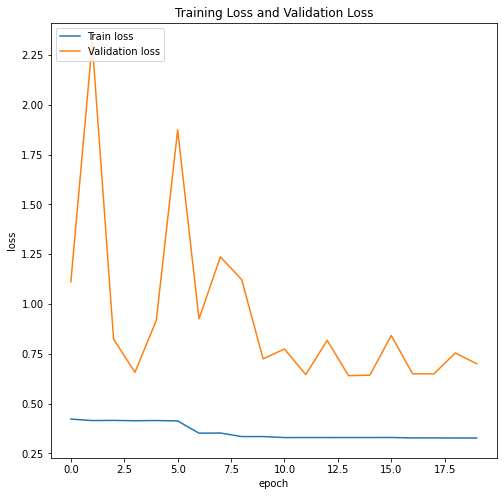

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training Loss and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

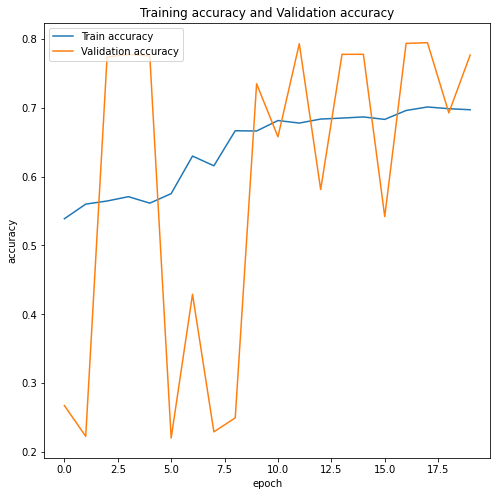

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training accuracy and Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

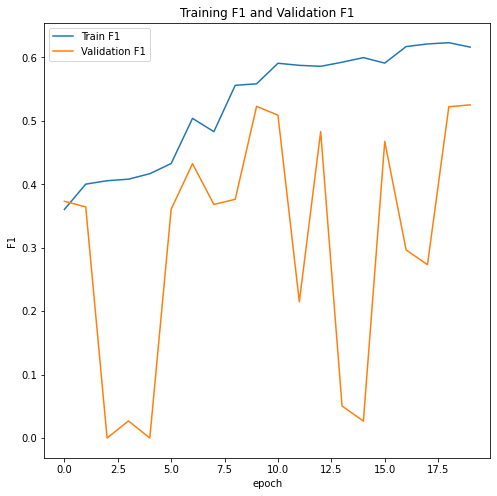

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(hist.history['get_f1'])
plt.plot(hist.history['val_get_f1'])
plt.title('Training F1 and Validation F1')
plt.ylabel('F1')
plt.xlabel('epoch')
plt.legend(['Train F1', 'Validation F1'], loc='upper left')
plt.show()

In [ ]:
best_model = keras.models.load_model("./svm_best.keras", {"get_f1" : get_f1, 
                                                          "RandomFourierFeatures" : keras.layers.experimental.RandomFourierFeatures(output_dim = 4096, 
                                                                                                                                    scale = 10.0, 
                                                                                                                                    kernel_initializer = keras.initializers.GlorotNormal())
                                                         }
                                     )

In [ ]:
y_true = []
for _, label_batch in test_data:
    for label in label_batch:
        y_true.append(label)

In [ ]:
preds = model.predict(test_data)



print(classification_report(y_true, preds > 0.5))

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       200
         1.0       0.20      0.23      0.21        56

    accuracy                           0.62       256
   macro avg       0.49      0.48      0.48       256
weighted avg       0.65      0.62      0.64       256



# Model 2 : Custom Deep Learning Model

In [ ]:
random.seed(0)
cnnclassifier1 = Sequential()

cnnclassifier1.add(Rescaling(1./255, input_shape=(224, 224, 3)))

cnnclassifier1.add(Conv2D(64, (3,3),  padding='same',activation = 'relu'))

cnnclassifier1.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
cnnclassifier1.add(BatchNormalization(axis=3))

cnnclassifier1.add(Conv2D(64, (3, 3), activation = 'relu'))

cnnclassifier1.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))

cnnclassifier1.add(BatchNormalization(axis=3))

cnnclassifier1.add(Conv2D(32, (3, 3), activation = 'relu'))

cnnclassifier1.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))

cnnclassifier1.add(BatchNormalization(axis=3))

cnnclassifier1.add(Conv2D(32, (3, 3), activation = 'relu'))

cnnclassifier1.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))

cnnclassifier1.add(BatchNormalization(axis=3))

cnnclassifier1.add(Conv2D(16, (3, 3), activation = 'relu'))

cnnclassifier1.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))

cnnclassifier1.add(BatchNormalization(axis=3))

cnnclassifier1.add(Flatten())

cnnclassifier1.add(Dense(units = 400, activation = 'relu'))

cnnclassifier1.add(Dropout(0.2))

cnnclassifier1.add(Dense(units = 256, activation = 'relu'))
cnnclassifier1.add(Dropout(0.2))

cnnclassifier1.add(Dense(units = 128, activation = 'relu'))

cnnclassifier1.add(Dense(units = 1, activation = 'sigmoid'))

cnnclassifier1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_19 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 110, 110, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 55, 55, 64)      

In [ ]:
cnnclassifier1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=3)
cnnHist = cnnclassifier1.fit(train_data, validation_data=val_data, epochs=15, callbacks=[red_lr],class_weight={0:3,1:25})

Epoch 1/15
167/167 [==============================] - 114s 650ms/step - loss: 3.9558 - accuracy: 0.5505 - val_loss: 1.6163 - val_accuracy: 0.2252 - lr: 0.0010
Epoch 2/15
167/167 [==============================] - 90s 519ms/step - loss: 3.7192 - accuracy: 0.5865 - val_loss: 1.3190 - val_accuracy: 0.2257 - lr: 0.0010
Epoch 3/15
167/167 [==============================] - 90s 520ms/step - loss: 3.6286 - accuracy: 0.6041 - val_loss: 0.8597 - val_accuracy: 0.5277 - lr: 0.0010
Epoch 4/15
167/167 [==============================] - 91s 529ms/step - loss: 3.5699 - accuracy: 0.6139 - val_loss: 0.8474 - val_accuracy: 0.5084 - lr: 0.0010
Epoch 5/15
167/167 [==============================] - 90s 520ms/step - loss: 3.4907 - accuracy: 0.6136 - val_loss: 0.9367 - val_accuracy: 0.4835 - lr: 0.0010
Epoch 6/15
167/167 [==============================] - 90s 519ms/step - loss: 3.4400 - accuracy: 0.6307 - val_loss: 0.7660 - val_accuracy: 0.5976 - lr: 0.0010
Epoch 7/15
167/167 [==============================]

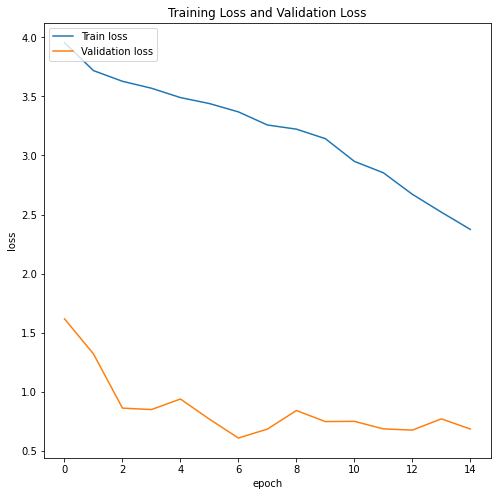

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(cnnHist.history['loss'])
plt.plot(cnnHist.history['val_loss'])
plt.title('Training Loss and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

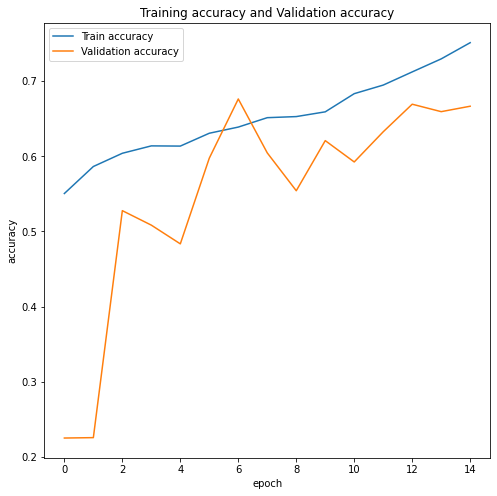

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(cnnHist.history['accuracy'])
plt.plot(cnnHist.history['val_accuracy'])
plt.title('Training accuracy and Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

In [ ]:
y_pred_test_cnn = []
y_true_test_cnn = []
for x, y in test_data:
    y_pred_test_cnn.append(cnnclassifier1.predict(x) > 0.5)
    y_true_test_cnn.append(y.numpy())

y_pred_test_cnn = np.concatenate(y_pred_test_cnn, axis=0)
y_true_test_cnn = np.concatenate(y_true_test_cnn, axis=0)

In [ ]:
print(classification_report(y_true_test_cnn, y_pred_test_cnn))

              precision    recall  f1-score   support

         0.0       0.92      0.63      0.75      1241
         1.0       0.39      0.82      0.53       361

    accuracy                           0.67      1602
   macro avg       0.66      0.72      0.64      1602
weighted avg       0.80      0.67      0.70      1602



Confusion Matrix for Test Data


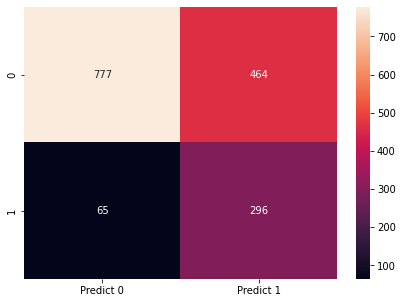

In [ ]:
print("Confusion Matrix for Test Data")
cm_test_cnn=confusion_matrix(y_true_test_cnn, y_pred_test_cnn, labels=[0, 1])

confmat_test_cnn = pd.DataFrame(cm_test_cnn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_test_cnn, annot=True,fmt='g')

In [ ]:
y_pred_val_cnn = []
y_true_val_cnn = []
for x, y in val_data:
    y_pred_val_cnn.append(cnnclassifier1.predict(x) > 0.5)
    y_true_val_cnn.append(y.numpy())
y_pred_val_cnn = np.concatenate(y_pred_val_cnn, axis=0)
y_true_val_cnn = np.concatenate(y_true_val_cnn, axis=0)

In [ ]:
print(classification_report(y_true_val_cnn, y_pred_val_cnn))

              precision    recall  f1-score   support

         0.0       0.93      0.62      0.74      2894
         1.0       0.39      0.84      0.53       841

    accuracy                           0.67      3735
   macro avg       0.66      0.73      0.64      3735
weighted avg       0.81      0.67      0.69      3735



Confusion Matrix for Validation Data


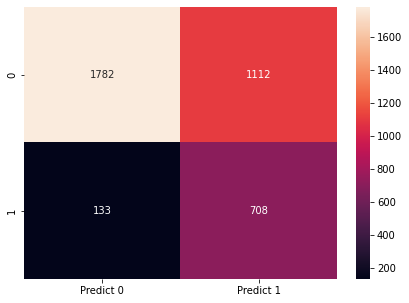

In [ ]:
print("Confusion Matrix for Validation Data")
cm_val_cnn=confusion_matrix(y_true_val_cnn, y_pred_val_cnn, labels=[0, 1])

confmat_val_cnn = pd.DataFrame(cm_val_cnn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_val_cnn, annot=True,fmt='g')

In [ ]:
y_pred_train_cnn = []
y_true_train_cnn = []
for x, y in train_data:
    y_pred_train_cnn.append(cnnclassifier1.predict(x) > 0.5)
    y_true_train_cnn.append(y.numpy())
y_pred_train_cnn = np.concatenate(y_pred_train_cnn, axis=0)
y_true_train_cnn = np.concatenate(y_true_train_cnn, axis=0)

In [ ]:
print(classification_report(y_true_train_cnn, y_pred_train_cnn))

              precision    recall  f1-score   support

         0.0       0.98      0.65      0.78     16537
         1.0       0.44      0.96      0.61      4810

    accuracy                           0.72     21347
   macro avg       0.71      0.80      0.69     21347
weighted avg       0.86      0.72      0.74     21347



Confusion Matrix for Training Data


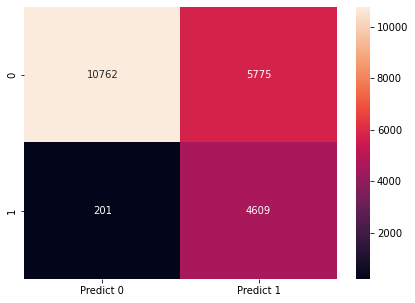

In [ ]:
print("Confusion Matrix for Training Data")
cm_train_cnn=confusion_matrix(y_true_train_cnn, y_pred_train_cnn, labels=[0, 1])

confmat_train_cnn = pd.DataFrame(cm_train_cnn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_train_cnn, annot=True,fmt='g')

# Model 3 : Transfer Learning

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2

In [ ]:
ENet = EfficientNetV2B2(include_top = False)
ENet.trainable = False

preprocessor = Conv2D(3, kernel_size = 3, activation = None, kernel_initializer = keras.initializers.Ones())
preprocessor.trainable = False

inputs = keras.Input(shape = (224, 224, 3))

feat = preprocessor(inputs)

feat = ENet(feat)

feat = Flatten()(feat)

outputs = Dense(1)(feat)

tl_model = keras.Model(inputs, outputs)

tl_model.summary()

tl_model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ["accuracy", get_f1],
    loss = keras.losses.BinaryCrossentropy(from_logits = True),
    
)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_29 (Conv2D)          (None, 222, 222, 3)       84        
                                                                 
 efficientnetv2-b2 (Function  (None, None, None, 1408)  8769374  
 al)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 68992)             0         
                                                                 
 dense_21 (Dense)            (None, 1)                 68993     
                                                                 
Total params: 8,838,451
Trainable params: 68,993
Non-trainable params: 8,769,458
___________________________________________

In [ ]:
tl_hist = tl_model.fit(
    train_data,
    batch_size = 128,
    epochs = 10,
    validation_data = val_data,
    class_weight = { 0 : 0.35, 1 : 0.65},
    callbacks = [#keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 2),
                 keras.callbacks.ReduceLROnPlateau(monitor = "val_get_f1", patience = 2),
                 keras.callbacks.ModelCheckpoint(monitor = "val_loss", filepath = "./best_tl")
    ]
)

Epoch 1/10
167/167 [==============================] - 155s 860ms/step - loss: 4.9913 - accuracy: 0.6724 - get_f1: 0.3683 - val_loss: 9.6191 - val_accuracy: 0.7470 - val_get_f1: 0.2798 - lr: 0.0010
Epoch 2/10
167/167 [==============================] - 167s 978ms/step - loss: 3.4699 - accuracy: 0.7230 - get_f1: 0.4547 - val_loss: 12.6577 - val_accuracy: 0.6450 - val_get_f1: 0.3822 - lr: 0.0010
Epoch 3/10
167/167 [==============================] - 192s 1s/step - loss: 3.1765 - accuracy: 0.7330 - get_f1: 0.4777 - val_loss: 10.0955 - val_accuracy: 0.7063 - val_get_f1: 0.4089 - lr: 0.0010
Epoch 4/10
167/167 [==============================] - 206s 1s/step - loss: 1.2311 - accuracy: 0.8103 - get_f1: 0.6118 - val_loss: 6.4314 - val_accuracy: 0.7183 - val_get_f1: 0.4553 - lr: 1.0000e-04
Epoch 5/10
167/167 [==============================] - 176s 1s/step - loss: 0.7740 - accuracy: 0.8257 - get_f1: 0.6388 - val_loss: 6.1084 - val_accuracy: 0.7119 - val_get_f1: 0.4394 - lr: 1.0000e-04
Epoch 6/10
167

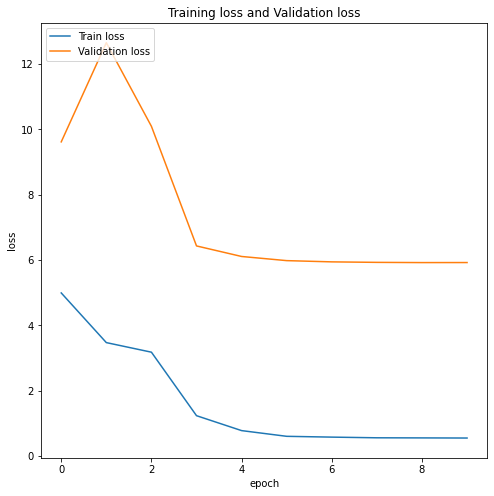

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(tl_hist.history['loss'])
plt.plot(tl_hist.history['val_loss'])
plt.title('Training loss and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

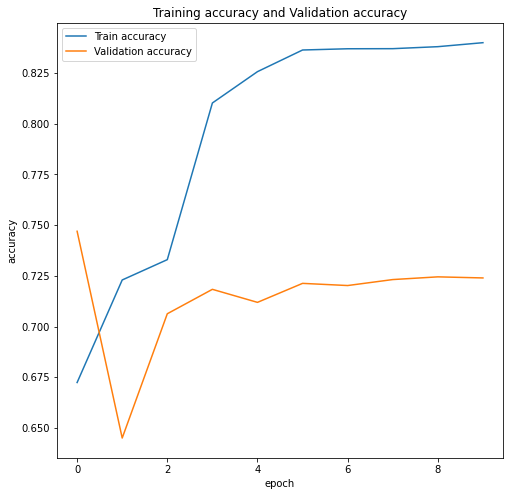

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(tl_hist.history['accuracy'])
plt.plot(tl_hist.history['val_accuracy'])
plt.title('Training accuracy and Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

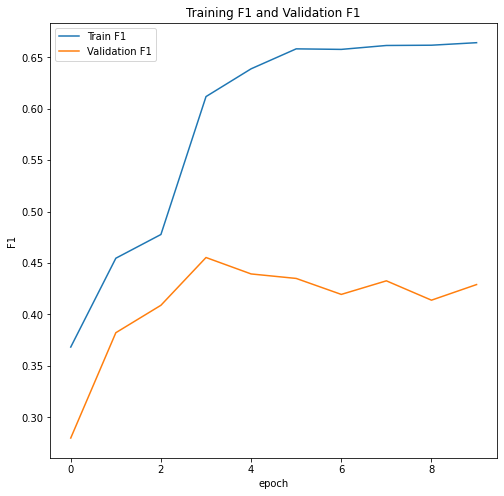

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(tl_hist.history['get_f1'])
plt.plot(tl_hist.history['val_get_f1'])
plt.title('Training F1 and Validation F1')
plt.ylabel('F1')
plt.xlabel('epoch')
plt.legend(['Train F1', 'Validation F1'], loc='upper left')
plt.show()

In [ ]:
y_pred_test_tl = []
y_true_test_tl = []
for x, y in test_data:
    y_pred_test_tl.append(tl_model.predict(x) > 0.5)
    y_true_test_tl.append(y.numpy())

y_pred_test_tl = np.concatenate(y_pred_test_tl, axis=0)
y_true_test_tl = np.concatenate(y_true_test_tl, axis=0)

In [ ]:
print(classification_report(y_true_test_tl,y_pred_test_tl))

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1241
         1.0       0.38      0.44      0.41       361

    accuracy                           0.71      1602
   macro avg       0.60      0.62      0.61      1602
weighted avg       0.73      0.71      0.72      1602



Confusion Matrix for Test Data


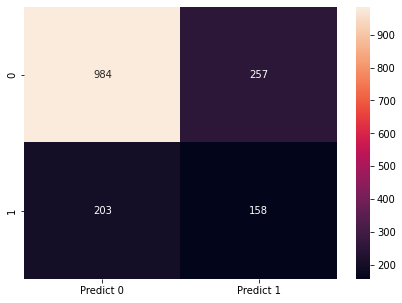

In [ ]:
print("Confusion Matrix for Test Data")
cm_test_tl=confusion_matrix(y_true_test_tl,y_pred_test_tl, labels=[0, 1])

confmat_test_tl = pd.DataFrame(cm_test_tl, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_test_tl, annot=True,fmt='g')

In [ ]:
y_pred_val_tl = []
y_true_val_tl = []
for x, y in val_data:
    y_pred_val_tl.append(tl_model.predict(x) > 0.5)
    y_true_val_tl.append(y.numpy())

y_pred_val_tl = np.concatenate(y_pred_val_tl, axis=0)
y_true_val_tl = np.concatenate(y_true_val_tl, axis=0)

In [ ]:
print(classification_report(y_true_val_tl,y_pred_val_tl))

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      2894
         1.0       0.40      0.46      0.43       841

    accuracy                           0.72      3735
   macro avg       0.62      0.63      0.62      3735
weighted avg       0.74      0.72      0.73      3735



Confusion Matrix for Validation Data


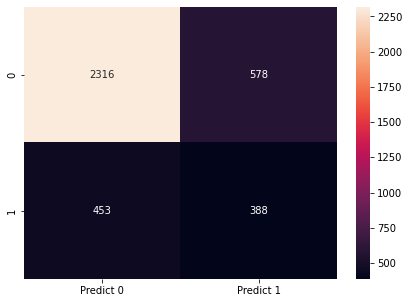

In [ ]:
print("Confusion Matrix for Validation Data")
cm_val_tl=confusion_matrix(y_true_val_tl,y_pred_val_tl, labels=[0, 1])

confmat_val_tl = pd.DataFrame(cm_val_tl, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_val_tl, annot=True,fmt='g')

In [ ]:
y_pred_train_tl = []
y_true_train_tl = []
for x, y in train_data:
    y_pred_train_tl.append(tl_model.predict(x) > 0.5)
    y_true_train_tl.append(y.numpy())

y_pred_train_tl = np.concatenate(y_pred_train_tl, axis=0)
y_true_train_tl = np.concatenate(y_true_train_tl, axis=0)

In [ ]:
print(classification_report(y_true_train_tl, y_pred_train_tl))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89     16537
         1.0       0.63      0.71      0.67      4810

    accuracy                           0.84     21347
   macro avg       0.77      0.79      0.78     21347
weighted avg       0.85      0.84      0.84     21347



Confusion Matrix for Training Data


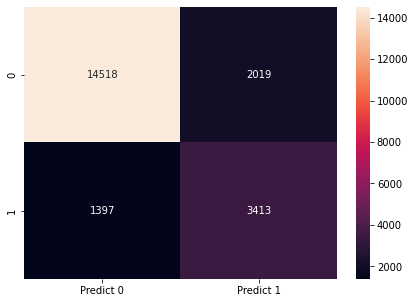

In [ ]:
print("Confusion Matrix for Training Data")
cm_train_tl=confusion_matrix(y_true_train_tl,y_pred_train_tl, labels=[0, 1])

confmat_train_tl = pd.DataFrame(cm_train_tl, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_train_tl, annot=True,fmt='g')

Densenet with chexnet weights

In [ ]:

random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
DNet = tf.keras.applications.densenet.DenseNet121(
    include_top=False,
    weights='imagenet',
    #weights=None,
    input_shape=(224,224,3)
)
predictions = tf.keras.layers.Dense(14, activation='softmax')(DNet.output)
DNet = tf.keras.Model(inputs=DNet.input, outputs=predictions)

DNet.load_weights('/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')
#DNet.load_weights('/content/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

for i in DNet.layers[0:200]:
  i.trainable = False
for i in DNet.layers[200:]:
  i.trainable = True

#DNet.trainable = False
DNetOutput = tf.keras.layers.Conv2D(16, kernel_size=3, padding='same', activation="relu")(DNet.layers[-2].output)
DNet = tf.keras.Model(inputs=DNet.input,outputs=DNetOutput)

#preprocessor = Rescaling(1./255)
#preprocessor.trainable = False

inputs = keras.Input(shape = (224, 224, 3))

#feat = preprocessor(inputs)
feat = tf.keras.applications.densenet.preprocess_input(inputs)


feat = DNet(feat)

feat = Conv2D(64, kernel_size=3, padding='same',activation="relu")(feat)
feat = BatchNormalization(axis=3)(feat)
feat = Conv2D(32, kernel_size=3, padding='same', activation="relu")(feat)
feat = BatchNormalization(axis=3)(feat)
feat = Conv2D(32, kernel_size=3, padding='same', activation="relu")(feat)
feat = BatchNormalization(axis=3)(feat)
feat = Conv2D(16, kernel_size=3, padding='same', activation="relu")(feat)
feat = BatchNormalization(axis=3)(feat)
feat = Conv2D(16, kernel_size=3, padding='same', activation="relu")(feat)
feat = BatchNormalization(axis=3)(feat)
feat = Flatten()(feat)


feat = Dense(256,activation='relu')(feat)
feat = BatchNormalization()(feat)
feat = Dense(128,activation='relu')(feat)
feat = BatchNormalization()(feat)
outputs = Dense(1,activation='sigmoid')(feat)

tl_model_densenet = keras.Model(inputs, outputs)

tl_model_densenet.summary()

  

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 model_7 (Functional)        (None, 7, 7, 16)          7184976   
                                                           

In [ ]:
tl_model_densenet.compile(
    optimizer ='rmsprop',
    metrics = ["accuracy"],
    loss = keras.losses.BinaryCrossentropy(),
    
)

In [ ]:
tl_hist_densenet = tl_model_densenet.fit(
    train_data,
    #batch_size = 128,
    epochs = 10,
    validation_data = val_data,
    class_weight = { 0 : 1.5, 1 : 50},
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=3)])

Epoch 1/10
167/167 [==============================] - 134s 695ms/step - loss: 3.0211 - accuracy: 0.5371 - val_loss: 0.4687 - val_accuracy: 0.7802 - lr: 0.0010
Epoch 2/10
167/167 [==============================] - 100s 580ms/step - loss: 2.5255 - accuracy: 0.5298 - val_loss: 0.8640 - val_accuracy: 0.8147 - lr: 0.0010
Epoch 3/10
167/167 [==============================] - 113s 658ms/step - loss: 2.3716 - accuracy: 0.5509 - val_loss: 1.1141 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 4/10
167/167 [==============================] - 110s 640ms/step - loss: 2.2305 - accuracy: 0.5787 - val_loss: 0.7602 - val_accuracy: 0.8319 - lr: 0.0010
Epoch 5/10
167/167 [==============================] - 102s 593ms/step - loss: 2.0746 - accuracy: 0.6211 - val_loss: 0.7006 - val_accuracy: 0.8367 - lr: 8.0000e-04
Epoch 6/10
167/167 [==============================] - 100s 582ms/step - loss: 1.9651 - accuracy: 0.6498 - val_loss: 0.6490 - val_accuracy: 0.8426 - lr: 8.0000e-04
Epoch 7/10
167/167 [==================

In [ ]:
y_pred_test_densenet = []
y_true_test_densenet = []
for x, y in test_data:
    y_pred_test_densenet.append(tl_model_densenet.predict(x) > 0.5)
    y_true_test_densenet.append(y.numpy())

y_pred_test_densenet = np.concatenate(y_pred_test_densenet, axis=0)
y_true_test_densenet = np.concatenate(y_true_test_densenet, axis=0)

In [ ]:

print(classification_report(y_true_test_densenet,y_pred_test_densenet))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1241
         1.0       0.62      0.60      0.61       361

    accuracy                           0.83      1602
   macro avg       0.75      0.75      0.75      1602
weighted avg       0.82      0.83      0.83      1602



Confusion Matrix for Test Data


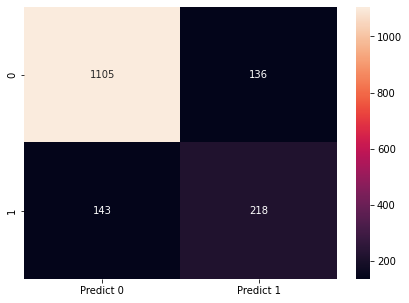

In [ ]:
print("Confusion Matrix for Test Data")
cm_test_densenet=confusion_matrix(y_true_test_densenet,y_pred_test_densenet, labels=[0, 1])

confmat_test_densenet = pd.DataFrame(cm_test_densenet, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_test_densenet, annot=True,fmt='g')

In [ ]:
y_pred_val_densenet = []
y_true_val_densenet = []
for x, y in val_data:
    y_pred_val_densenet.append(tl_model_densenet.predict(x) > 0.5)
    y_true_val_densenet.append(y.numpy())

y_pred_val_densenet = np.concatenate(y_pred_val_densenet, axis=0)
y_true_val_densenet = np.concatenate(y_true_val_densenet, axis=0)

In [ ]:
print(classification_report(y_true_val_densenet,y_pred_val_densenet))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2894
         1.0       0.62      0.62      0.62       841

    accuracy                           0.83      3735
   macro avg       0.76      0.76      0.76      3735
weighted avg       0.83      0.83      0.83      3735



Confusion Matrix for Validation Data


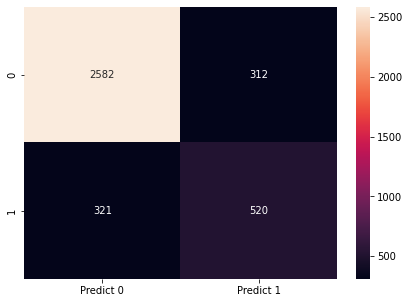

In [ ]:
print("Confusion Matrix for Validation Data")
cm_val_densenet=confusion_matrix(y_true_val_densenet,y_pred_val_densenet, labels=[0, 1])

confmat_val_densenet = pd.DataFrame(cm_val_densenet, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_val_densenet, annot=True,fmt='g')

In [ ]:
y_pred_train_densenet = []
y_true_train_densenet = []
for x, y in train_data:
    y_pred_train_densenet.append(tl_model_densenet.predict(x) > 0.5)
    y_true_train_densenet.append(y.numpy())

y_pred_train_densenet = np.concatenate(y_pred_train_densenet, axis=0)
y_true_train_densenet = np.concatenate(y_true_train_densenet, axis=0)

In [ ]:
print(classification_report(y_true_train_densenet, y_pred_train_densenet))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     16537
         1.0       0.67      0.66      0.66      4810

    accuracy                           0.85     21347
   macro avg       0.79      0.78      0.78     21347
weighted avg       0.85      0.85      0.85     21347



Confusion Matrix for Training Data


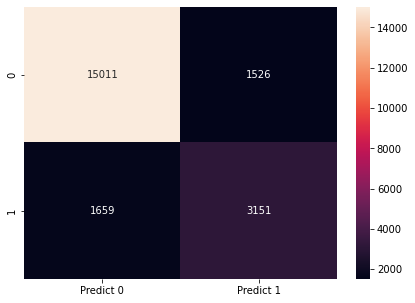

In [ ]:
print("Confusion Matrix for Training Data")
cm_train_densenet=confusion_matrix(y_true_train_densenet,y_pred_train_densenet, labels=[0, 1])

confmat_train_densenet = pd.DataFrame(cm_train_densenet, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(confmat_train_densenet, annot=True,fmt='g')

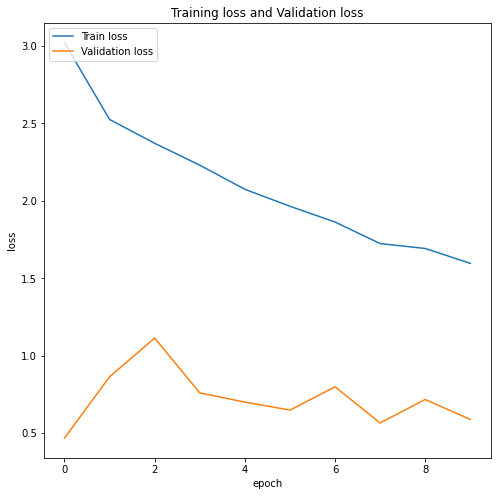

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(tl_hist_densenet.history['loss'])
plt.plot(tl_hist_densenet.history['val_loss'])
plt.title('Training loss and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

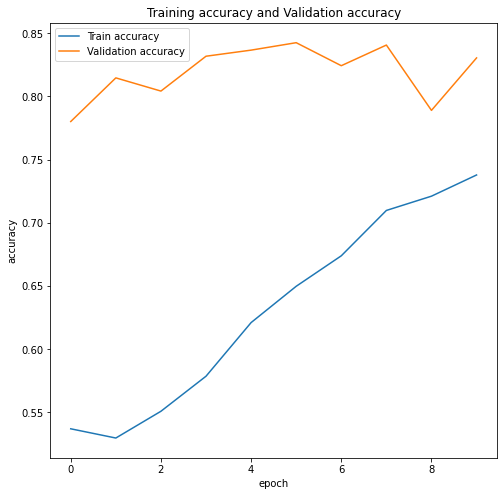

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(tl_hist_densenet.history['accuracy'])
plt.plot(tl_hist_densenet.history['val_accuracy'])
plt.title('Training accuracy and Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

In [ ]:
tl_model_densenet_saved = tf.keras.models.load_model('/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/tl_model_chexnet_78valacc.h5') 
tl_model_densenet_saved.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 model_4 (Functional)        (None, 7, 7, 16)          7184976   
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          9280      
                                                                 
 batch_normalization_7 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 32)          18464     
                                                           

In [ ]:
y_pred_test_densenet1 = []
y_true_test_densenet1 = []
for x, y in test_data:
    y_pred_test_densenet1.append(tl_model_densenet_saved.predict(x) > 0.5)
    y_true_test_densenet1.append(y.numpy())

y_pred_test_densenet1 = np.concatenate(y_pred_test_densenet1, axis=0)
y_true_test_densenet1 = np.concatenate(y_true_test_densenet1, axis=0)

In [ ]:
print(classification_report(y_true_test_densenet1,y_pred_test_densenet1))

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83      1241
         1.0       0.49      0.83      0.61       361

    accuracy                           0.76      1602
   macro avg       0.71      0.79      0.72      1602
weighted avg       0.83      0.76      0.78      1602



In [ ]:
tl_model_densenet.save('/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/tl_model_chexnet_83valacc.h5')
tl_model_densenet.save_weights("/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/tl_model_chexnet_weights_83valacc.h5")

Ensemble Approach

In [ ]:
preprocessor_rescale = Rescaling(1./255)
preprocessor_rescale.trainable = False

input_shape = (224,224,3)

input_layer = preprocessor_rescale(Input(shape = (224, 224, 3)))

input_layer_mobilenet = tf.keras.applications.mobilenet.preprocess_input(Input(shape = (224, 224, 3)))
input_layer_densenet = tf.keras.applications.densenet.preprocess_input(Input(shape = (224, 224, 3)))
input_layer_ENet=tf.keras.applications.efficientnet.preprocess_input(Input(shape = (224, 224, 3)))

mobilenet_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = input_shape)
ENet_model = EfficientNetV2B2(weights = 'imagenet',include_top = False)
#ENet_model.trainable = False


DNet_model = tf.keras.applications.densenet.DenseNet121(
    include_top=False,
    #weights='imagenet',
    weights=None,
    input_shape=(224,224,3)
)
#DNet_model.trainable = False
predictions = tf.keras.layers.Dense(14, activation='softmax')(DNet_model.output)
DNet_model = tf.keras.Model(inputs=DNet_model.input, outputs=predictions)

DNet_model.load_weights('/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

DNetOutput = tf.keras.layers.Conv2D(16, kernel_size=3, padding='same', activation="relu")(DNet_model.layers[-2].output)
DNet_model = tf.keras.Model(inputs=DNet_model.input,outputs=DNetOutput)


for layer in mobilenet_model.layers[0:200]:
#for layer in mobilenet_model.layers:
    layer.trainable =  False
for layer in mobilenet_model.layers[200:]:
    layer.trainable =  True
#for layer in ENet_model.layers[0:200]:
for layer in ENet_model.layers:
    layer.trainable =  False
for layer in ENet_model.layers[200:]:
    layer.trainable =  True
for layer in DNet_model.layers[0:200]:
    layer.trainable =  False
for layer in DNet_model.layers[200:]:
    layer.trainable =  True
#for layer in DNet_model.layers:
#    layer.trainable = False




mobilenet = mobilenet_model(tf.keras.applications.mobilenet.preprocess_input(input_layer))
#model_mobilenet = GlobalAveragePooling2D()(mobilenet)
#output_mobilenet = Flatten()(mobilenet)
mobilenet_output = tf.keras.layers.Conv2D(16, kernel_size=3, padding='same', activation="relu")(mobilenet)
densenet121 = DNet_model(tf.keras.applications.densenet.preprocess_input(input_layer))
#densenetnet121 = GlobalAveragePooling2D()(densenet121)
#densenet121_output = Flatten()(dense121)
densenet121_output = tf.keras.layers.Conv2D(16, kernel_size=3, padding='same', activation="relu")(densenet121)
effnet = ENet_model(tf.keras.applications.efficientnet.preprocess_input(input_layer))
#effnet = GlobalAveragePooling2D()(effnet)
#effnet_output = Flatten()(effnet)
effnet_output= tf.keras.layers.Conv2D(16, kernel_size=3, padding='same', activation="relu")(effnet)
merged = tf.keras.layers.Concatenate()([mobilenet_output,densenet121_output,effnet_output])

x = BatchNormalization()(merged)

x = Conv2D(64, kernel_size=3, padding='same',activation="relu")(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(32, kernel_size=3, padding='same', activation="relu")(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(32, kernel_size=3, padding='same', activation="relu")(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(16, kernel_size=3, padding='same', activation="relu")(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(16, kernel_size=3, padding='same', activation="relu")(x)
x = BatchNormalization(axis=3)(x)
x = Flatten()(x)



x = Dense(256,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(128,activation = 'relu')(x)
x = Dropout(0.2)(x)

x = BatchNormalization()(x)
x = Dense(64,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(1, activation = 'sigmoid')(x)
tl_model_ensemble = tf.keras.models.Model(inputs = input_layer, outputs = x)

In [ ]:
tl_model_ensemble.compile(
    optimizer ='rmsprop',
    metrics = ["accuracy"],
    loss = keras.losses.BinaryCrossentropy(),
    
)

In [ ]:
tl_hist_ensemble = tl_model_ensemble.fit(
    train_data,
    #batch_size = 128,
    epochs = 10,
    validation_data = val_data,
    class_weight = { 0 : 1.5, 1 : 55},
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=3)]
)

Epoch 1/10
167/167 [==============================] - 166s 791ms/step - loss: 3.4035 - accuracy: 0.5227 - val_loss: 1.0354 - val_accuracy: 0.8021 - lr: 0.0010
Epoch 2/10
167/167 [==============================] - 127s 739ms/step - loss: 2.6682 - accuracy: 0.5040 - val_loss: 0.7735 - val_accuracy: 0.8185 - lr: 0.0010
Epoch 3/10
167/167 [==============================] - 126s 736ms/step - loss: 2.5020 - accuracy: 0.5296 - val_loss: 0.9629 - val_accuracy: 0.7863 - lr: 0.0010
Epoch 4/10
167/167 [==============================] - 127s 737ms/step - loss: 2.3646 - accuracy: 0.5604 - val_loss: 0.8392 - val_accuracy: 0.7995 - lr: 0.0010
Epoch 5/10
167/167 [==============================] - 127s 737ms/step - loss: 2.2256 - accuracy: 0.5804 - val_loss: 0.7100 - val_accuracy: 0.8035 - lr: 0.0010
Epoch 6/10
167/167 [==============================] - 137s 801ms/step - loss: 2.1364 - accuracy: 0.6172 - val_loss: 0.6736 - val_accuracy: 0.8072 - lr: 0.0010
Epoch 7/10
167/167 [==========================

In [ ]:
y_pred_test_tl_ensemble = []
y_true_test_tl_ensemble = []
for x, y in test_data:
    y_pred_test_tl_ensemble.append(tl_model_ensemble.predict(x) > 0.5)
    y_true_test_tl_ensemble.append(y.numpy())

y_pred_test_tl_ensemble = np.concatenate(y_pred_test_tl_ensemble, axis=0)
y_true_test_tl_ensemble = np.concatenate(y_true_test_tl_ensemble, axis=0)

In [ ]:

print(classification_report(y_true_test_tl_ensemble,y_pred_test_tl_ensemble))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1241
         1.0       0.63      0.57      0.60       361

    accuracy                           0.83      1602
   macro avg       0.75      0.74      0.74      1602
weighted avg       0.82      0.83      0.82      1602



In [ ]:
tl_model_ensemble.save('/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/tl_model_ensemble_83valacc.h5')
tl_model_ensemble.save_weights("/content/drive/MyDrive/Capstone Project/Pneumonia Detection Data Set/tl_model_ensemble_weights_83valacc.h5")

# Semantic Segmentation

### Simple model to get an idea of the problem's difficulty

In [7]:
from tensorflow.keras import layers

def get_model(img_size, num_classes):
    inputs = keras.Input(shape = img_size + (1,))
    x = layers.Rescaling(1. / 255)(inputs) #remember to resize!!
    first_down = layers.SeparableConv2D(filters = 64, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)
    x = layers.SeparableConv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same")(first_down)
    second_down = layers.SeparableConv2D(filters = 128, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)
    x = layers.SeparableConv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same")(second_down)
    third_down = layers.SeparableConv2D(filters = 256, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)
    x = layers.SeparableConv2D(filters = 256, kernel_size = 3, activation = "relu", padding = "same")(third_down)
    #Now the model differs from previous model, apart from just striding
    x = layers.Conv2DTranspose(256, 3, activation = "relu", padding = "same")(x)
    third_up = layers.Conv2DTranspose(256, 3, activation = "relu", padding = "same", strides = 2)(layers.add([x, third_down]))
    x = layers.Conv2DTranspose(128, 3, activation = "relu", padding = "same")(third_up)
    second_up = layers.Conv2DTranspose(128, 3, activation = "relu", padding = "same", strides = 2)(layers.add([x, second_down]))
    x = layers.Conv2DTranspose(64, 3, activation = "relu", padding = "same")(second_up)
    first_up = layers.Conv2DTranspose(64, 3, activation = "relu", padding = "same", strides = 2)(layers.add([x, first_down]))
    #x = layers.Conv2DTranspose(32, 3, activation = "relu", padding = "same", strides = 2)(first_up)
    outputs = layers.Conv2D(num_classes, 3, activation = "sigmoid", padding = "same")(first_up)

    model = keras.Model(inputs, outputs)
    return model
@tf.function
def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return 1 - (numerator / (denominator + tf.keras.backend.epsilon()))

In [8]:
seg_model_baseline = get_model(img_size = (256, 256), num_classes = 1)

seg_model_baseline.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate = 1.),
    loss = dice_coefficient,
    metrics = ["accuracy"],
    
)

gc.collect()

seg_model_baseline.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 1)  0           ['input_1[0][0]']                
                                                                                                  
 separable_conv2d (SeparableCon  (None, 128, 128, 64  137        ['rescaling[0][0]']              
 v2D)                           )                                                                 
                                                                                              

In [ ]:
history = seg_model_baseline.fit(
    x = train_data_samples,
    y = train_data_targets,
    validation_split = 0.1,
    epochs = 10,
    batch_size = 64,
    callbacks = [#keras.callbacks.EarlyStopping(monitor = "val_loss", restore_best_weights = True),
                 keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", patience = 2, factor = 0.75),
                ]
)

Epoch 1/10
374/374 [==============================] - 394s 1s/step - loss: 0.9459 - accuracy: 0.0289 - val_loss: 0.9766 - val_accuracy: 0.0119 - lr: 1.0000
Epoch 2/10
374/374 [==============================] - 366s 978ms/step - loss: 0.9459 - accuracy: 0.0279 - val_loss: 0.9766 - val_accuracy: 0.0119 - lr: 1.0000
Epoch 3/10
374/374 [==============================] - 366s 978ms/step - loss: 0.9459 - accuracy: 0.0279 - val_loss: 0.9766 - val_accuracy: 0.0119 - lr: 1.0000
Epoch 4/10
197/374 [==============>...............] - ETA: 2:47 - loss: 0.9462 - accuracy: 0.0277

In [10]:
gc.collect()

seg_model_baseline.evaluate(test_data_samples, test_data_targets)

4/4 [==============================] - 1s 160ms/step - loss: 0.0056 - accuracy: 0.9917


[0.0056465379893779755, 0.9917008876800537]

In [12]:
seg_model_baseline.save("./best_baseline")

In [41]:
def show_pred(index):
  prediction = seg_model_baseline.predict(test_data_samples[np.newaxis, index])
  print(prediction * 255, "\n\n\n")
  plt.imshow(keras.utils.array_to_img(test_data_samples[index]), cmap = "gray")
  plt.show()
  plt.imshow(keras.utils.array_to_img(test_data_targets[index] * 255), cmap = "gray")
  plt.show()
  plt.imshow(keras.utils.array_to_img((prediction * 255).reshape(256, 256, 1)), cmap = "gray")
  plt.show()

  gc.collect()

In [50]:
del seg_model_baseline
gc.collect()

31603